## Câu 1
### Bài toán phân loại và hồi quy sử dụng các phương pháp học máy

### Mục tiêu
Sử dụng các phương pháp học máy đã học (và có thể mở rộng thêm các phương pháp khác) để giải bài toán theo cả hai hướng: phân loại (classification) và hồi quy (regression). Thực hiện quy trình gồm các bước dưới đây để xử lý và đánh giá bài toán.

---

### Các bước thực hiện

#### 1. Thống kê đặc điểm của dữ liệu bằng Data Visualization
   - Khám phá đặc điểm tổng quát của dữ liệu, bao gồm phân phối của các biến, sự tương quan giữa các đặc trưng, và xác định các mẫu dữ liệu bất thường (outliers).
   - Sử dụng các biểu đồ như histogram, boxplot, scatter plot, heatmap,... để thể hiện trực quan các đặc điểm này.

#### 2. Tiền xử lý dữ liệu
   - **Type Conversion**: Chuyển đổi kiểu dữ liệu nếu cần thiết (ví dụ: từ dạng chuỗi sang số hoặc nhãn phân loại).
   - **Data Normalization**: Chuẩn hóa dữ liệu để đưa các giá trị về cùng thang đo, tăng hiệu quả của các thuật toán học máy.

#### 3. Phân chia dữ liệu thành tập train và tập evaluation
   - Chia dữ liệu thành hai tập: **Train** và **Evaluation** theo tỷ lệ phù hợp (ví dụ 80/20 hoặc 70/30).
   - Đảm bảo rằng cả hai tập này đều có phân phối dữ liệu phù hợp để đảm bảo tính đại diện.

#### 4. Thực hiện phân loại và hồi quy
   - **Phân loại (Classification)**: Áp dụng các phương pháp phân loại khác nhau như SVM, KNN, Random Forest, hoặc các thuật toán khác.
   - **Hồi quy (Regression)**: Thử nghiệm các phương pháp hồi quy như Linear Regression, Decision Tree Regressor, SVR,...

#### 5. Đánh giá kết quả và so sánh các phương pháp
   - Đánh giá hiệu quả của các phương pháp bằng các chỉ số như độ chính xác, F1-score cho phân loại, hoặc MAE, RMSE cho hồi quy.
   - **So sánh các phương pháp**: Sử dụng biểu đồ để hiển thị kết quả của các phương pháp phân loại và hồi quy, cho phép quan sát sự khác biệt giữa các phương pháp một cách trực quan.
   - **Biểu đồ trực quan**: Ví dụ sử dụng bar chart hoặc line chart để thể hiện độ chính xác, lỗi trung bình của các phương pháp.

---

### Kết luận
Tóm tắt các kết quả đạt được từ các phương pháp phân loại và hồi quy, nêu bật phương pháp hiệu quả nhất trong việc giải quyết bài toán.


## Thêm các thư viện

In [1]:
!pip install jcopml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.6 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=8fda4349fd58ce7562aad65751c6a2afb6addf009db4ef9e829e38a19bcf2fa8
  Stored in directory: /root/.cache/pip/wheels/1b/f0/69/8cd4944dd9637953ab744056b5faa32617cd4de449b213e886
Successfully built jcopml


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot, boxcox
import pylab
from jcopml.plot import plot_residual, plot_actual_vs_prediction, plot_roc_curve


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [4]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score

## Thống kê dữ liệu

### Tổng quan dữ liệu

In [5]:
pd.options.display.max_columns = None

In [6]:
rental = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=';', encoding='latin1')

rental.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,NaN,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [7]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [8]:
rental.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [9]:
rental.shape

(10000, 22)

### Kiểm tra dữ liệu bị thiếu

In [10]:
rental.isnull().sum()

,0
id,0
category,0
title,0
body,0
amenities,3549
bathrooms,34
bedrooms,7
currency,0
fee,0
has_photo,0


In [11]:
rental.pets_allowed.value_counts()

,count
pets_allowed,
"Cats,Dogs",5228
Cats,485
Dogs,124


In [12]:
rental.loc[rental['pets_allowed'].isna(), 'pets_allowed'] = 'No'

In [13]:
rental.pets_allowed.value_counts()

,count
pets_allowed,
"Cats,Dogs",5228
No,4163
Cats,485
Dogs,124


In [14]:
rental.loc[rental['cityname'].isna() | rental['state'].isna(), ['longitude', 'latitude']].value_counts()

,,count
longitude,latitude,
-98.5576,39.8163,66
-82.1971,28.4590,1


In [15]:
rental = rental.drop(columns=['address'])

In [16]:
rental = rental.dropna(subset=['bathrooms', 'bedrooms', 'price', 'price_display', 'latitude', 'longitude'])
rental.isna().sum()

,0
id,0
category,0
title,0
body,0
amenities,3508
bathrooms,0
bedrooms,0
currency,0
fee,0
has_photo,0


In [17]:
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-98.5576), 'cityname'] = 'Lebanon'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-98.5576), 'state'] = 'KS'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-75.9597), 'cityname'] = 'Cape Charles'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-75.9597), 'state'] = 'VA'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-92.2006), 'cityname'] = 'Waynesville'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-92.2006), 'state'] = 'MO'

rental = rental.dropna(subset=['cityname', 'state'])
rental.loc[:, ['cityname', 'state']].isna().sum()

,0
cityname,0
state,0


In [18]:
rental['amenities'].value_counts().head(5)

,count
amenities,
Parking,229
"Dishwasher,Refrigerator",225
Pool,168
"Dishwasher,Parking,Pool",149
Dishwasher,147


In [19]:
rental.loc[:, 'amenities'] = rental['amenities'].fillna(value='basic')

luxury_amenities = [
    "Gym", "Pool", "Clubhouse", "Hot Tub",
    "Doorman", "Gated", "View",
    "Tennis", "Elevator", "Fireplace",
    "Basketball Court", "Basketball", "Playground"
]

luxury_pattern = '|'.join(luxury_amenities)

rental.loc[:, 'amenities'] = ['luxury' if any(amenity in x for amenity in luxury_amenities) else 'basic' for x in rental['amenities']]

rental['amenities'].value_counts()

,count
amenities,
basic,5593
luxury,4356


In [20]:
rental.isna().sum()

,0
id,0
category,0
title,0
body,0
amenities,0
bathrooms,0
bedrooms,0
currency,0
fee,0
has_photo,0


In [21]:
rental['fee'].value_counts()

,count
fee,
No,9949


In [22]:
rental = rental.drop(['title', 'body', 'id'], axis=1)
rental = rental.drop(['category', 'currency', 'fee'], axis=1)
rental = rental.drop(['price_type'], axis=1)
rental = rental.drop(['price_display'],axis=1)

In [23]:
numer = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'time']
rental.loc[:, numer].describe()

,bathrooms,bedrooms,price,square_feet,time
count,9949.000000,9949.000000,9949.000000,9949.000000,9.949000e+03
mean,1.380591,1.747512,1487.647502,943.285456,1.574881e+09
std,0.615332,0.941587,1077.387033,526.440776,3.767721e+06
min,1.000000,0.000000,200.000000,107.000000,1.568744e+09
25%,1.000000,1.000000,950.000000,650.000000,1.568781e+09
50%,1.000000,2.000000,1275.000000,803.000000,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,1.577359e+09
max,8.500000,9.000000,52500.000000,11318.000000,1.577362e+09


### Trực quan hóa dữ liệu

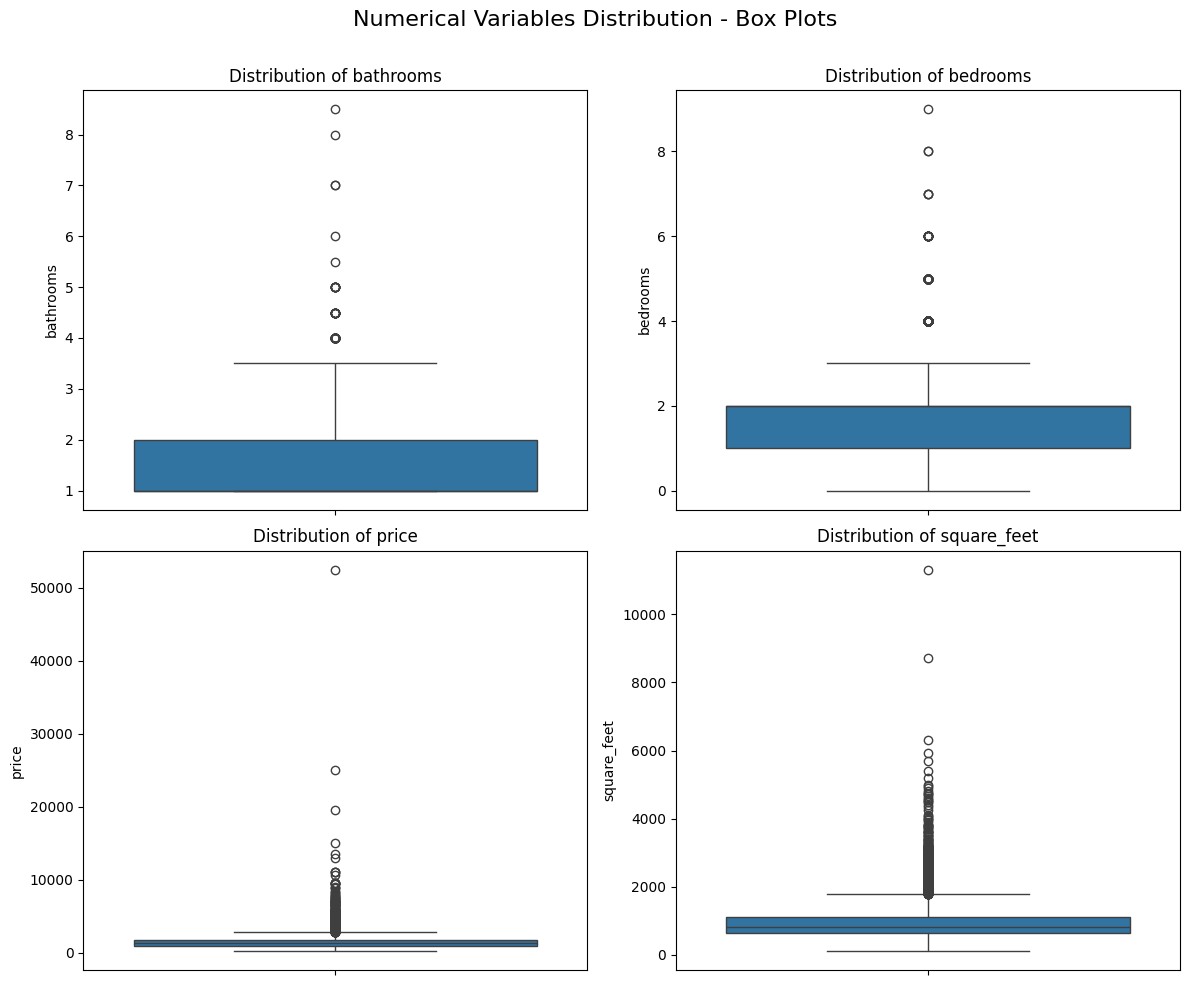

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, feature in zip(axes.flatten(), numer[:4]):
    sns.boxplot(y=rental[feature], ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_ylabel(feature)


fig.suptitle("Numerical Variables Distribution - Box Plots", fontsize=16)
fig.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

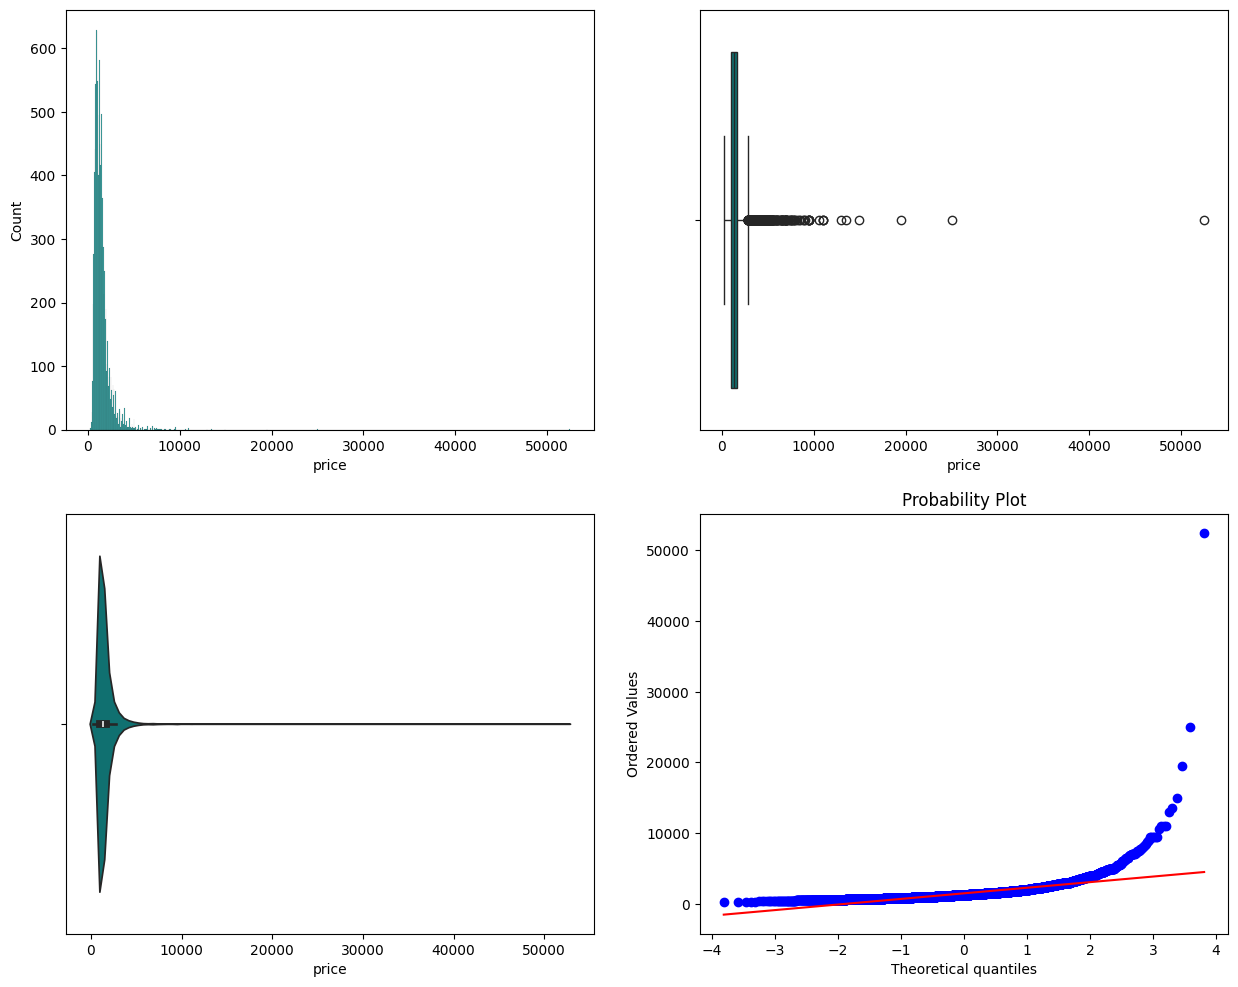

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
ax1 = sns.histplot(x = rental['price'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = rental['price'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = rental['price'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(rental['price'], plot=pylab)
pylab.show()

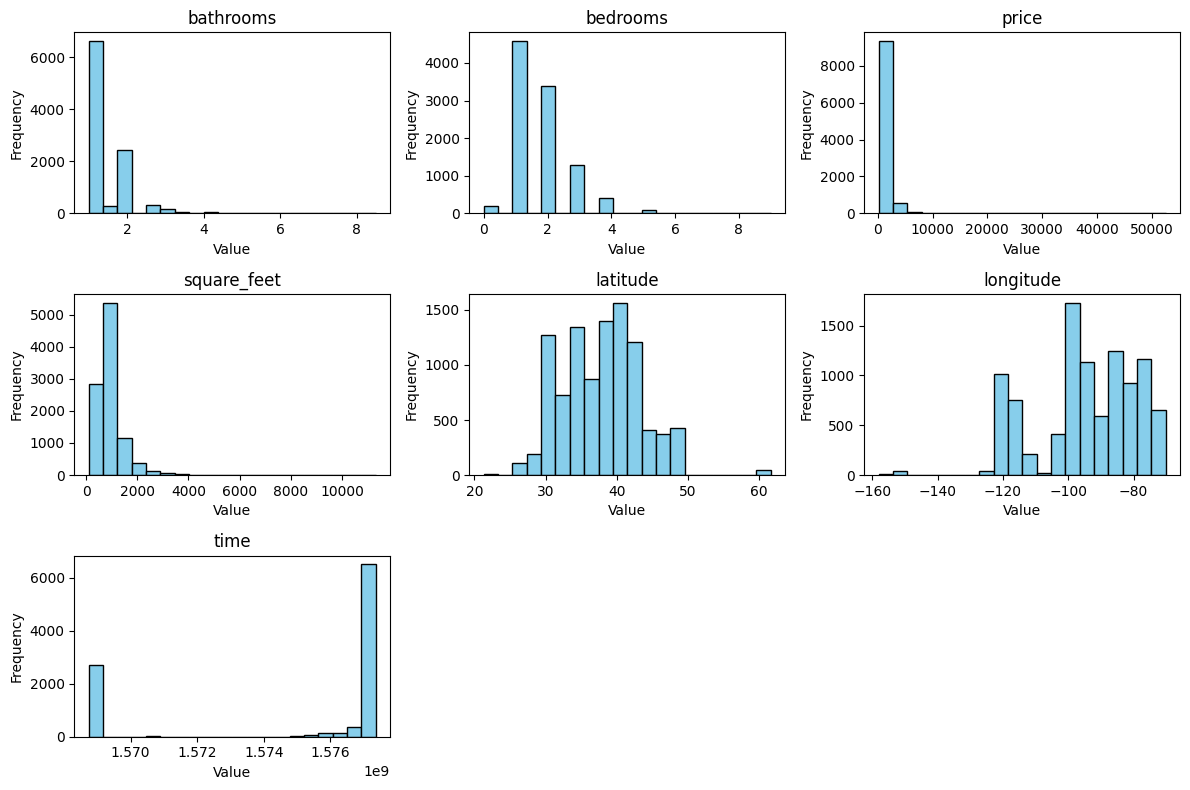

In [26]:
numerical_columns = rental.select_dtypes(include=['float64', 'int64'])

# Plot histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(rental[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

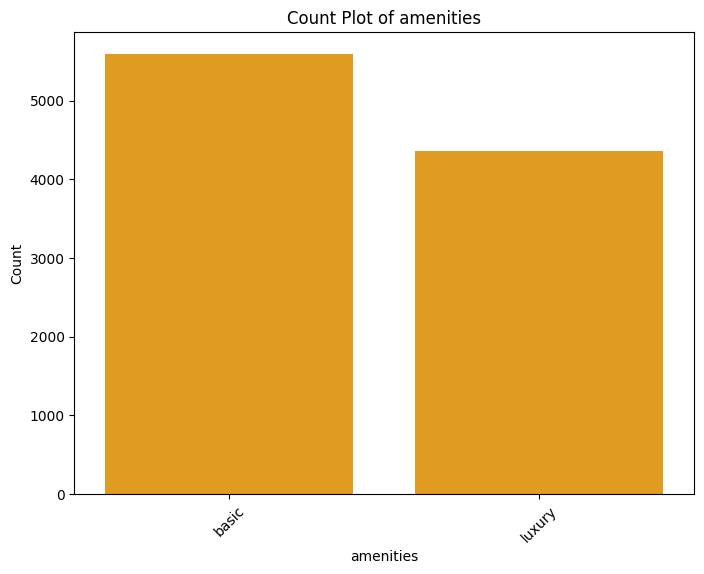

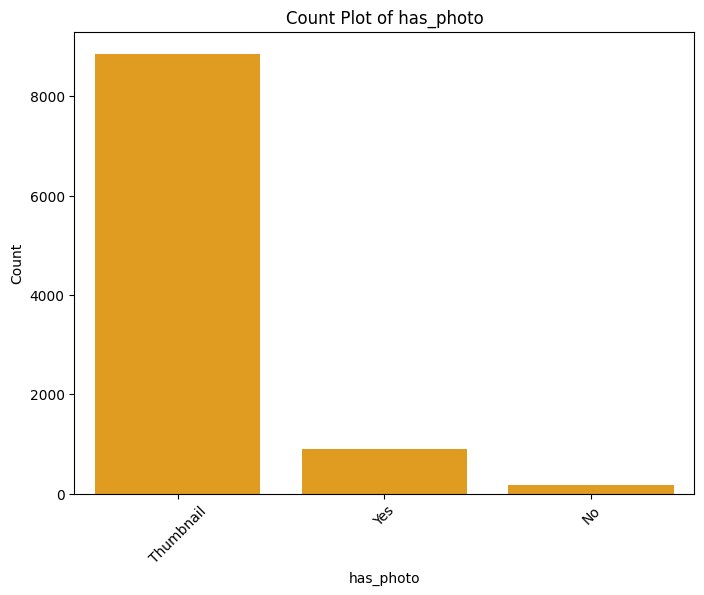

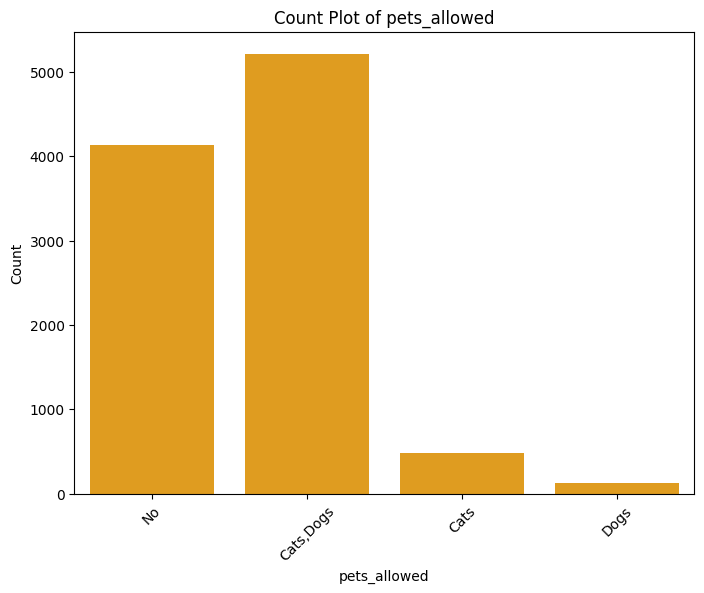

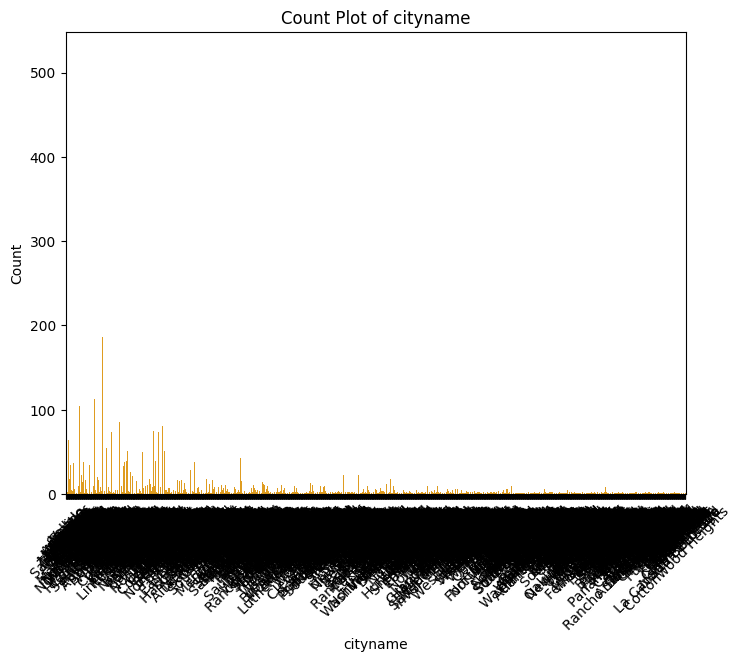

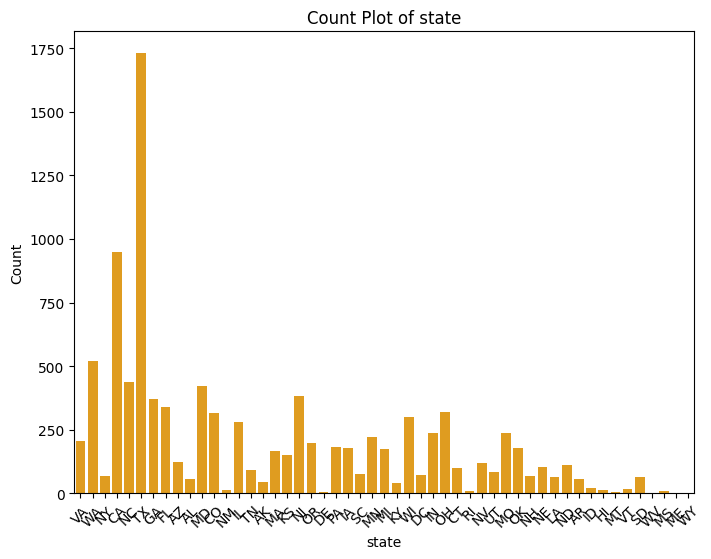

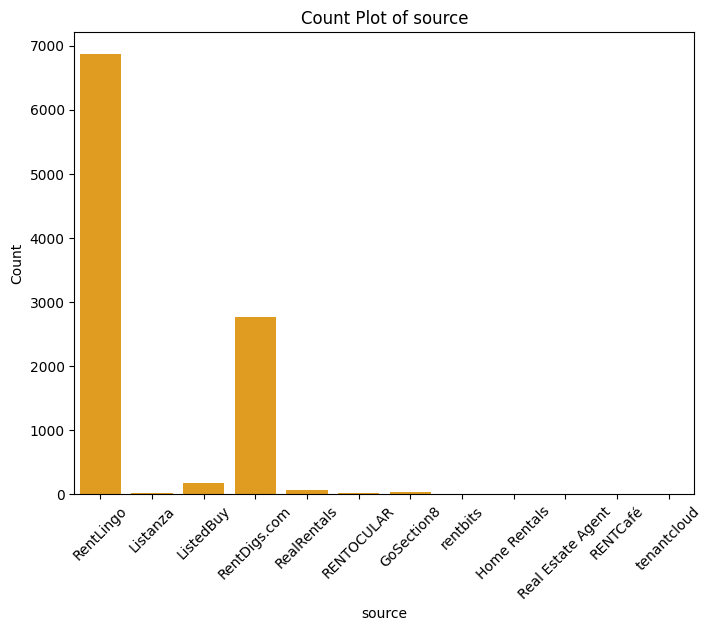

In [27]:
# Select categorical columns
categorical_columns = rental.select_dtypes(include='object')

# Plot count plots
for column in categorical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=rental, x=column, color='orange')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [28]:
# import folium

# map_center = [rental['latitude'].mean(), rental['longitude'].mean()]
# mymap = folium.Map(location=map_center, zoom_start=10)

# mean_price = rental['price'].mean()
# std_price = rental['price'].std()

# for idx, row in rental.iterrows():
#     if row['price'] < mean_price - std_price:
#         color = 'green'
#     elif mean_price - std_price <= row['price'] <= mean_price + std_price:
#         color = 'blue'
#     else:
#         color = 'red'

#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=5,
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.6,
#         tooltip=f"{row['cityname']}: ${row['price']}"
#     ).add_to(mymap)

# mymap.save('map.html')

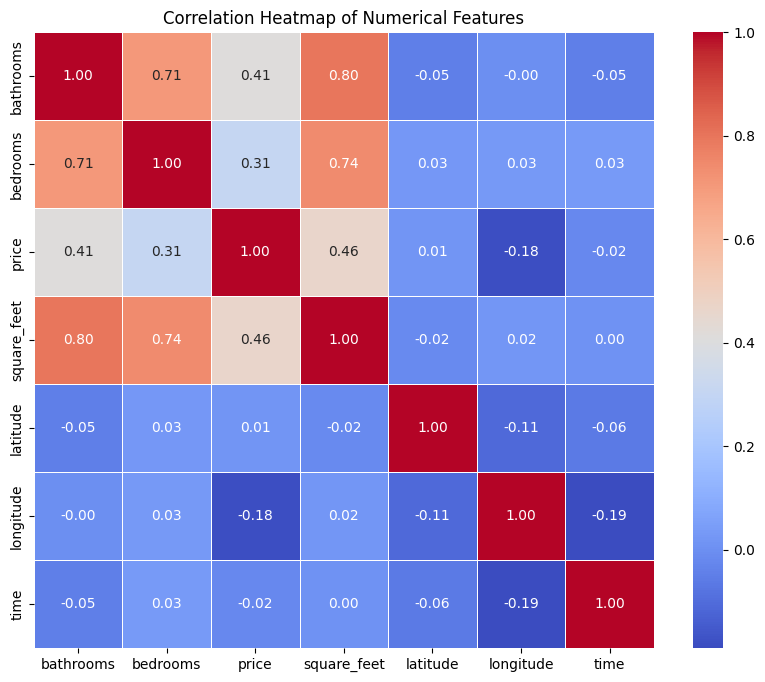

In [29]:
rental_a = rental
numerical_columns = rental.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Xử lý dữ liệu

In [30]:
rental.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9949.000000,9949.000000,9949.000000,9949.000000,9949.000000,9949.000000,9.949000e+03
mean,1.380591,1.747512,1487.647502,943.285456,37.697032,-94.665136,1.574881e+09
std,0.615332,0.941587,1077.387033,526.440776,5.500716,15.760433,3.767721e+06
min,1.000000,0.000000,200.000000,107.000000,21.315500,-158.022100,1.568744e+09
25%,1.000000,1.000000,950.000000,650.000000,33.679500,-101.301700,1.568781e+09
50%,1.000000,2.000000,1275.000000,803.000000,38.809800,-93.651600,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.302600,1.577359e+09
max,8.500000,9.000000,52500.000000,11318.000000,61.594000,-70.191600,1.577362e+09


In [31]:
rental['time'] = pd.to_datetime(rental['time'])

#
rental['year'] = rental['time'].dt.year
rental['month'] = rental['time'].dt.month
rental['day_of_week'] = rental['time'].dt.dayofweek
rental['hour'] = rental['time'].dt.hour

rental['is_weekend'] = rental['day_of_week'].isin([5, 6]).astype(int)

rental.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,year,month,day_of_week,hour,is_weekend
2,basic,1.0,0.0,Thumbnail,No,1390,107,Arlington,VA,38.8910,-77.0816,RentLingo,1970-01-01 00:00:01.577359410,1970,1,3,0,0
3,basic,1.0,0.0,Thumbnail,No,925,116,Seattle,WA,47.6160,-122.3275,RentLingo,1970-01-01 00:00:01.576667743,1970,1,3,0,0
5,luxury,1.0,0.0,Thumbnail,No,2475,130,Manhattan,NY,40.7629,-73.9885,Listanza,1970-01-01 00:00:01.577289784,1970,1,3,0,0
8,basic,1.0,0.0,Thumbnail,No,1495,138,San Francisco,CA,37.7599,-122.4379,RentLingo,1970-01-01 00:00:01.577358313,1970,1,3,0,0
14,basic,1.0,0.0,Thumbnail,No,1695,190,San Francisco,CA,37.7599,-122.4379,RentLingo,1970-01-01 00:00:01.577015121,1970,1,3,0,0


In [32]:
print(rental['has_photo'].unique())
rental['has_photo'] = rental['has_photo'].map({'Thumbnail': 1, 'No': 0, 'Yes':1 })

print(rental['pets_allowed'].unique())
rental['pets_allowed'] = rental['pets_allowed'].map(lambda x: 0 if x == 'None' else 1)

print(rental.head())

['Thumbnail' 'Yes' 'No']
['No' 'Cats,Dogs' 'Cats' 'Dogs']
   amenities  bathrooms  bedrooms  has_photo  pets_allowed  price  \
2      basic        1.0       0.0          1             1   1390   
3      basic        1.0       0.0          1             1    925   
5     luxury        1.0       0.0          1             1   2475   
8      basic        1.0       0.0          1             1   1495   
14     basic        1.0       0.0          1             1   1695   

    square_feet       cityname state  latitude  longitude     source  \
2           107      Arlington    VA   38.8910   -77.0816  RentLingo   
3           116        Seattle    WA   47.6160  -122.3275  RentLingo   
5           130      Manhattan    NY   40.7629   -73.9885   Listanza   
8           138  San Francisco    CA   37.7599  -122.4379  RentLingo   
14          190  San Francisco    CA   37.7599  -122.4379  RentLingo   

                            time  year  month  day_of_week  hour  is_weekend  
2  1970-01-01 0

In [33]:
# columns_to_drop = ['amenities','pets_allowed', 'address',"time","price_display","title","body","currency","id","state","cityname","price_type"]

# rental = rental.drop(columns=columns_to_drop)

# print(rental.head())

rental = rental.drop(columns=['time', 'cityname', 'state'])

In [34]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9949 entries, 2 to 9999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amenities     9949 non-null   object 
 1   bathrooms     9949 non-null   float64
 2   bedrooms      9949 non-null   float64
 3   has_photo     9949 non-null   int64  
 4   pets_allowed  9949 non-null   int64  
 5   price         9949 non-null   int64  
 6   square_feet   9949 non-null   int64  
 7   latitude      9949 non-null   float64
 8   longitude     9949 non-null   float64
 9   source        9949 non-null   object 
 10  year          9949 non-null   int32  
 11  month         9949 non-null   int32  
 12  day_of_week   9949 non-null   int32  
 13  hour          9949 non-null   int32  
 14  is_weekend    9949 non-null   int64  
dtypes: float64(4), int32(4), int64(5), object(2)
memory usage: 1.1+ MB


## Phân chia dữ liệu

In [35]:
# scaler = MinMaxScaler()

# columns_to_scale = ['bathrooms', 'bedrooms']

# # Khởi tạo StandardScaler
# scaler = MinMaxScaler()

# # Chuẩn hóa các cột
# rental[columns_to_scale] = scaler.fit_transform(rental[columns_to_scale])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

rental['amenities'] = label_encoder.fit_transform(rental['amenities'])

rental = pd.get_dummies(rental)

# Tạo X_class (dữ liệu đầu vào) và y_class (nhãn là cột 'amenities_encoded')
X_class = rental.drop('amenities', axis=1)  # Loại bỏ cột 'amenities' và 'amenities_encoded'
y_class = rental['amenities']
#Phân loại
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)
X = rental.drop('square_feet', axis= 1)

y = rental['square_feet']
bc_result = boxcox(y)
y_boxcox = bc_result[0]
lambda_ = bc_result[1]
#Hồi quy
X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size= 0.2, random_state = 42)



In [36]:
X_train.shape, y_train.shape

((7959, 25), (7959,))

In [37]:
X_test.shape, y_test.shape

((1990, 25), (1990,))

In [38]:
X_train_class.shape, y_train_class.shape

((6964, 25), (6964,))

In [39]:
X_test_class.shape, y_test_class.shape

((2985, 25), (2985,))

## Xây dựng mô hình

### Hồi quy

In [40]:
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
dt_reg = DecisionTreeRegressor()
gbs_reg = GradientBoostingRegressor()

In [41]:
linear_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
gbs_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [42]:
# make predictions
y_pred_lin_reg = linear_reg.predict(X_test)
y_pred_forest_reg = rf_reg.predict(X_test)
y_pred_tree_reg = dt_reg.predict(X_test)
y_pred_gradient_reg = gbs_reg.predict(X_test)

In [43]:

lin_r2 = r2_score(y_test , y_pred_lin_reg)
print("Linear Regression R-squared: {}".format(lin_r2))

forest_r2 = r2_score(y_test , y_pred_forest_reg)
print("Random Forest R-squared: {}".format(forest_r2))

decision_r2 = r2_score(y_test, y_pred_tree_reg)
print("Decision Tree R-squared: {}".format(decision_r2))

gradient_r2 = r2_score(y_test, y_pred_gradient_reg)
print("Gradient Boosting R-squared: {}".format(gradient_r2))

Linear Regression R-squared: 0.6089966131534973
Random Forest R-squared: 0.7285728822802788
Decision Tree R-squared: 0.5219996256855091
Gradient Boosting R-squared: 0.7116533806877063


In [44]:
lin_mse = mean_squared_error(y_pred_lin_reg, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE: {}".format(lin_rmse))

forest_mse = mean_squared_error(y_pred_forest_reg, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))


decision_mse = mean_squared_error(y_pred_tree_reg, y_test)
decision_rmse = np.sqrt(decision_mse)
print("Decision Tree Regression RMSE: {}".format(decision_rmse))

gradient_mse = mean_squared_error(y_pred_gradient_reg, y_test)
gradient_rmse = np.sqrt(gradient_mse)
print("Gradient Boosting RMSE: {}".format(gradient_rmse))

Linear Regression RMSE: 0.12127198178102648
Random Forest Regression RMSE: 0.10104081312885389
Decision Tree Regression RMSE: 0.13408627730324105
Gradient Boosting RMSE: 0.10414241561591676


In [45]:
lin_mae = mean_absolute_error(y_pred_lin_reg, y_test)
print("Liner Regression MAE: {}".format(lin_mae))
forest_mae = mean_absolute_error(y_pred_forest_reg, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))

decision_mae = mean_absolute_error(y_pred_tree_reg, y_test)
print("Decision Tree Regression MAE: {}".format(decision_mae))

gradient_mae = mean_absolute_error(y_pred_tree_reg, y_test)
print("Gradient Boosting MAE: {}".format(gradient_mae))

Liner Regression MAE: 0.08490813569633968
Random Forest Regression MAE: 0.07085870560159502
Decision Tree Regression MAE: 0.08935517891498788
Gradient Boosting MAE: 0.08935517891498788


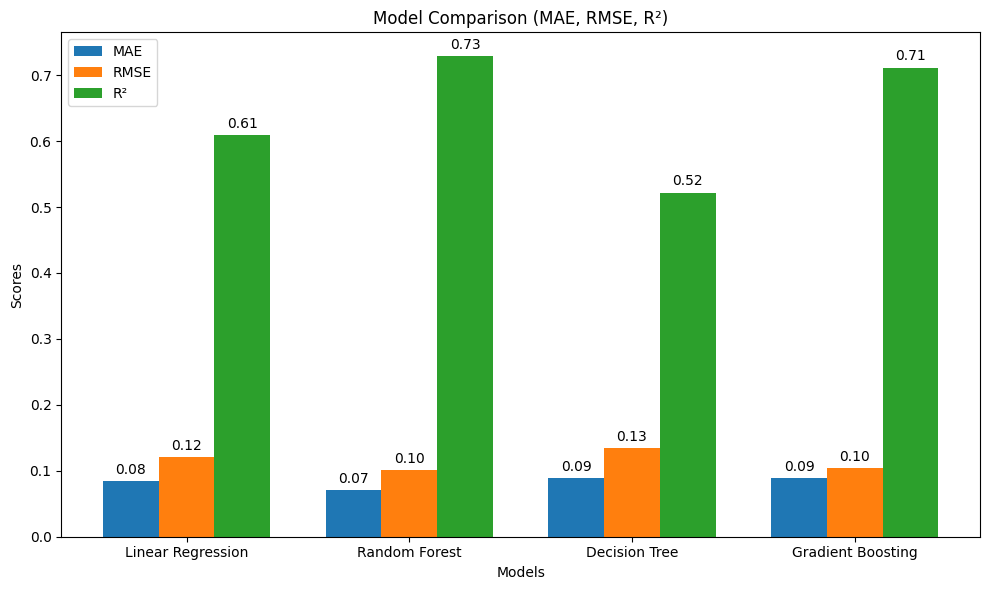

In [46]:
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

mae_values = [lin_mae, forest_mae, decision_mae, gradient_mae]
rmse_values = [lin_rmse, forest_rmse, decision_rmse, gradient_rmse]
r2_values = [lin_r2, forest_r2, decision_r2, gradient_r2]

# Vẽ biểu đồ MAE, RMSE và R²
x = np.arange(len(models))  # Vị trí các mô hình trên trục x
width = 0.25  # Khoảng cách giữa các nhóm

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cho MAE, RMSE và R²
rects1 = ax.bar(x - width, mae_values, width, label='MAE')
rects2 = ax.bar(x, rmse_values, width, label='RMSE')
rects3 = ax.bar(x + width, r2_values, width, label='R²')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison (MAE, RMSE, R²)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Hiển thị giá trị trên từng cột
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text
                    textcoords="offset points",
                    ha='center', va='bottom')

# Gọi hàm add_labels để hiển thị giá trị trên các cột
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

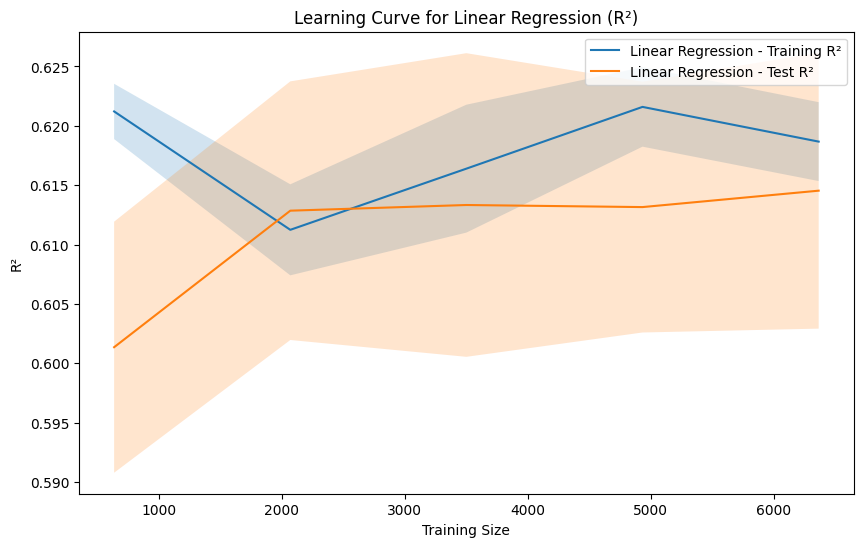

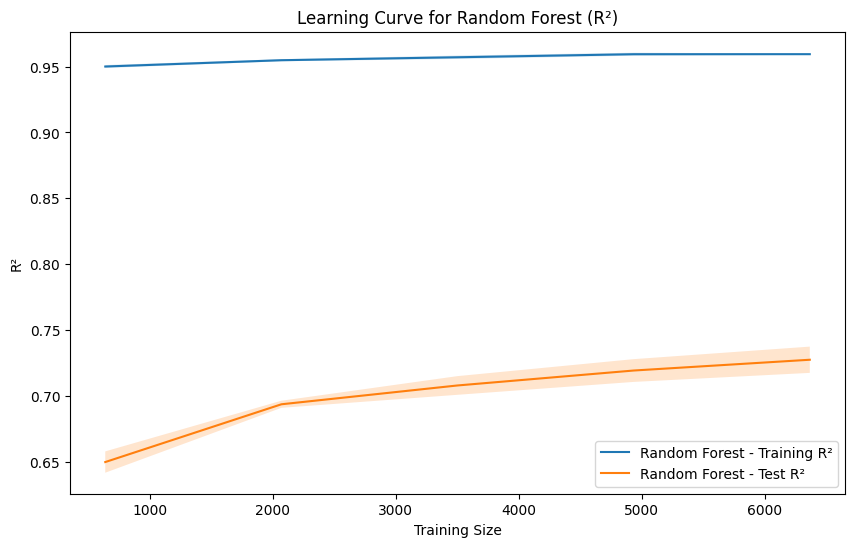

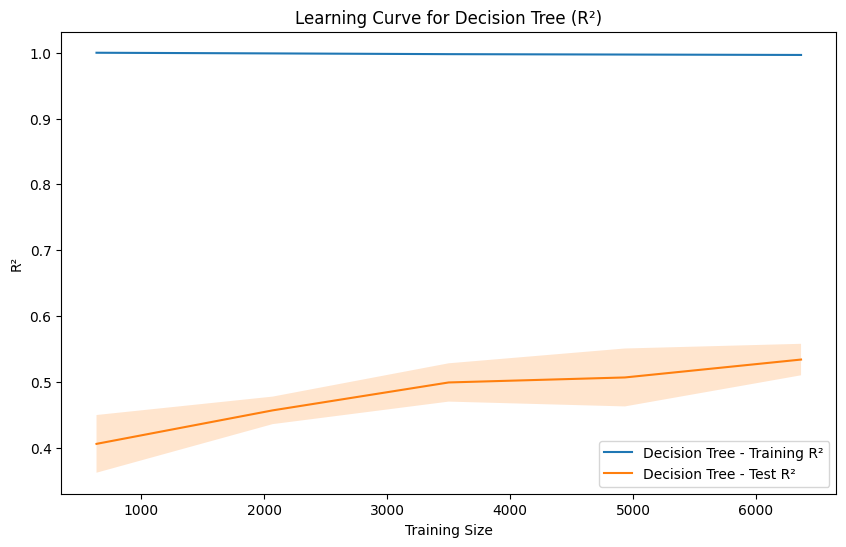

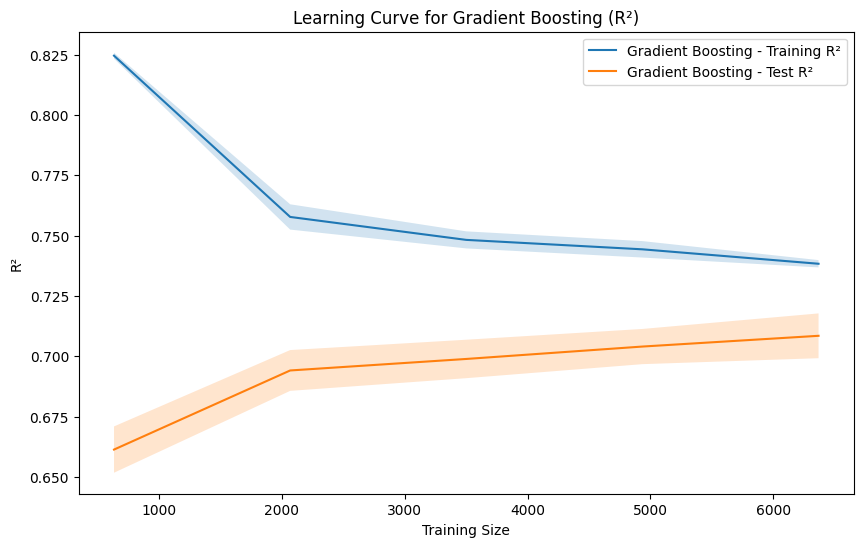

In [47]:
# Danh sách các mô hình
model_list = [linear_reg, rf_reg, dt_reg, gbs_reg]
model_names = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
learning_curve_results = {}
for model, model_name in zip(model_list, model_names):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring="r2")

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    learning_curve_results[model_name] = pd.DataFrame({
        f'{model_name} Training Size': train_sizes,
        f'{model_name} Train R² Mean': train_mean,
        f'{model_name} Test R² Mean': test_mean
    })

    # Tạo đồ thị riêng cho mỗi mô hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label=f"{model_name} - Training R²")
    plt.plot(train_sizes, test_mean, label=f"{model_name} - Test R²")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
    plt.xlabel('Training Size')
    plt.ylabel('R²')
    plt.legend()
    plt.title(f'Learning Curve for {model_name} (R²)')
    plt.show()


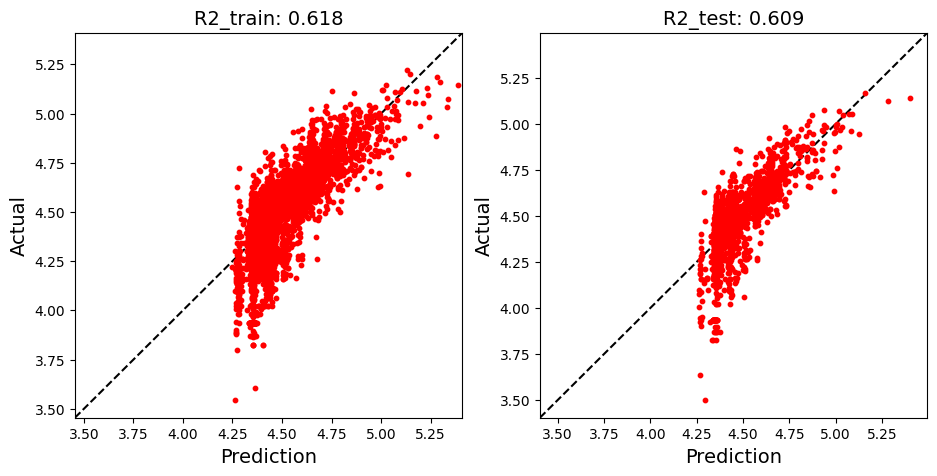

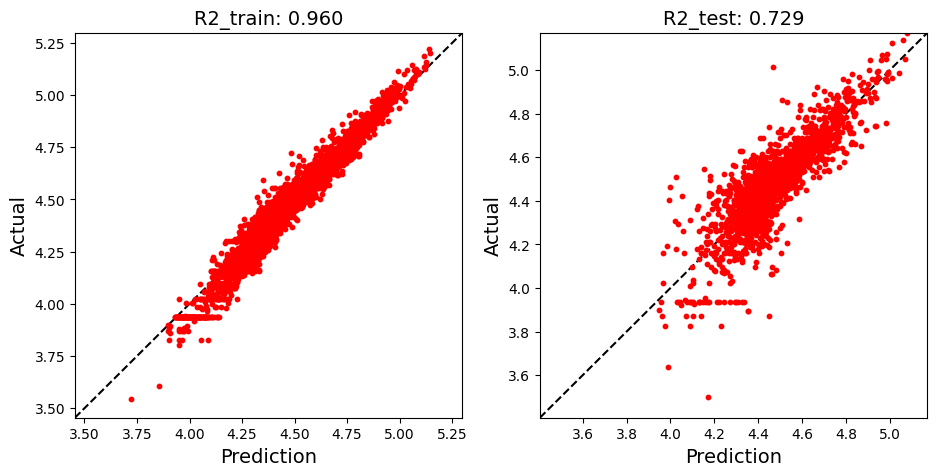

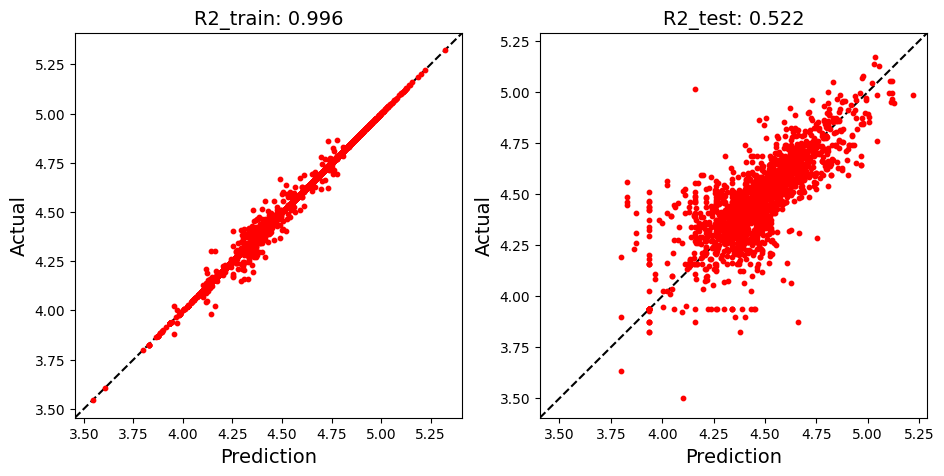

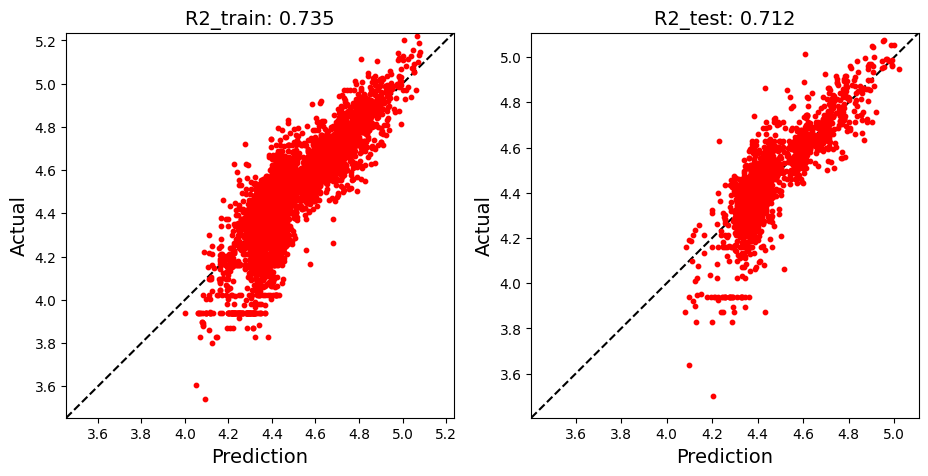

In [48]:
model_list = [linear_reg, rf_reg, dt_reg, gbs_reg]
for model in model_list:
    plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)


### Phân loại

In [49]:
log_reg = LogisticRegression(max_iter = 150)
dt_cls = DecisionTreeClassifier()
knn_cls = KNeighborsClassifier(n_neighbors=1)

In [50]:
#Huấn luyện
log_reg.fit(X_train_class, y_train_class)
dt_cls.fit(X_train_class,y_train_class)
knn_cls.fit(X_train_class,y_train_class)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=1)

In [51]:
y_pred_log_reg = log_reg.predict(X_test_class)
y_pred_dt_cls = dt_cls.predict(X_test_class)
y_pred_knn_cls = knn_cls.predict(X_test_class)

In [52]:
acc_log_reg = accuracy_score(y_test_class, y_pred_log_reg)
acc_dt_cls = accuracy_score(y_test_class, y_pred_dt_cls)
acc_knn_cls = accuracy_score(y_test_class, y_pred_knn_cls)

In [53]:
models = ['Logistic Regression', 'Decision Tree', 'KNN']
accuracies = [acc_log_reg, acc_dt_cls, acc_knn_cls]

# Tạo DataFrame
accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

accuracy_df

,Model,Accuracy
0,Logistic Regression,0.682077
1,Decision Tree,0.680737
2,KNN,0.577889


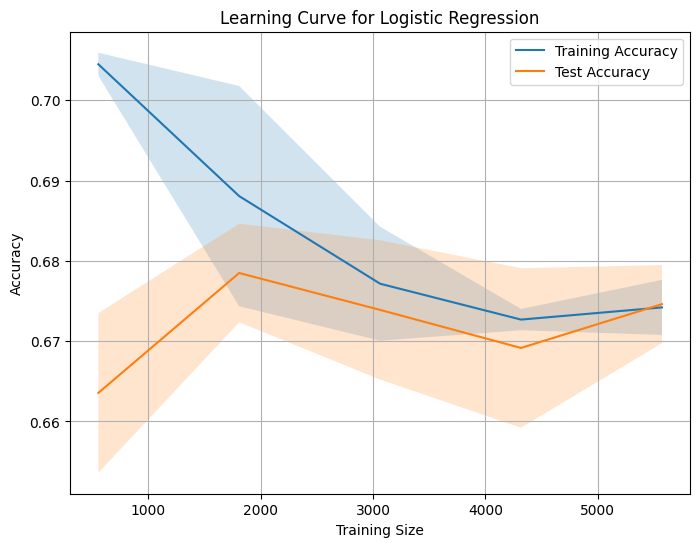

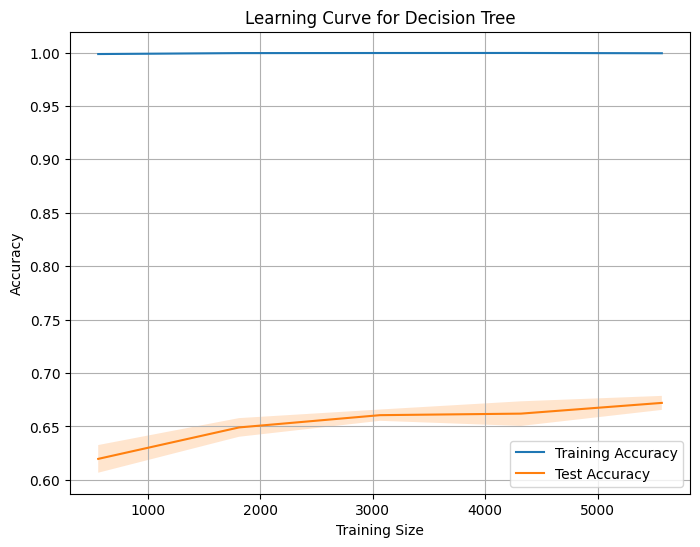

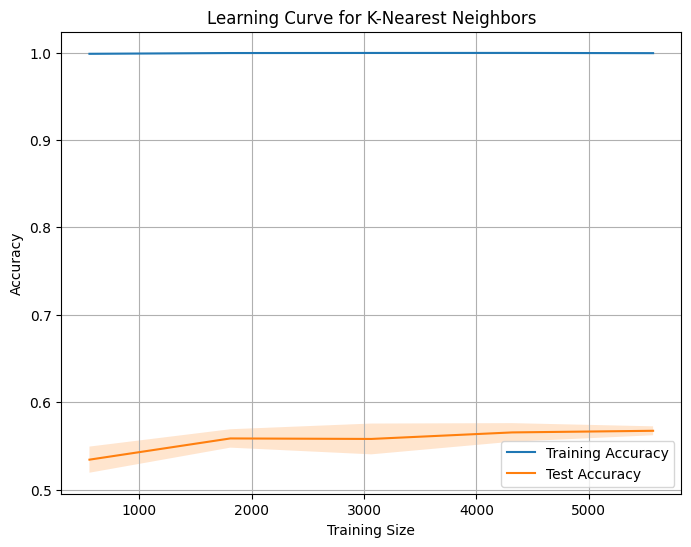

In [54]:
model_list = [log_reg, dt_cls, knn_cls]
model_names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors']
learning_curve_results_class = {}

# Vẽ learning curves cho từng mô hình
for model, model_name in zip(model_list, model_names):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_class, y_train_class, cv=5, scoring="accuracy", n_jobs=-1
    )

    # Tính trung bình và độ lệch chuẩn của điểm số trên tập huấn luyện và tập kiểm tra
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    learning_curve_results_class[model_name] = pd.DataFrame({
        f'{model_name} Training Size': train_sizes,
        f'{model_name} Train R² Mean': train_mean,
        f'{model_name} Test R² Mean': test_mean
    })

    # Vẽ learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_mean, label="Test Accuracy")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Thêm tiêu đề và nhãn
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

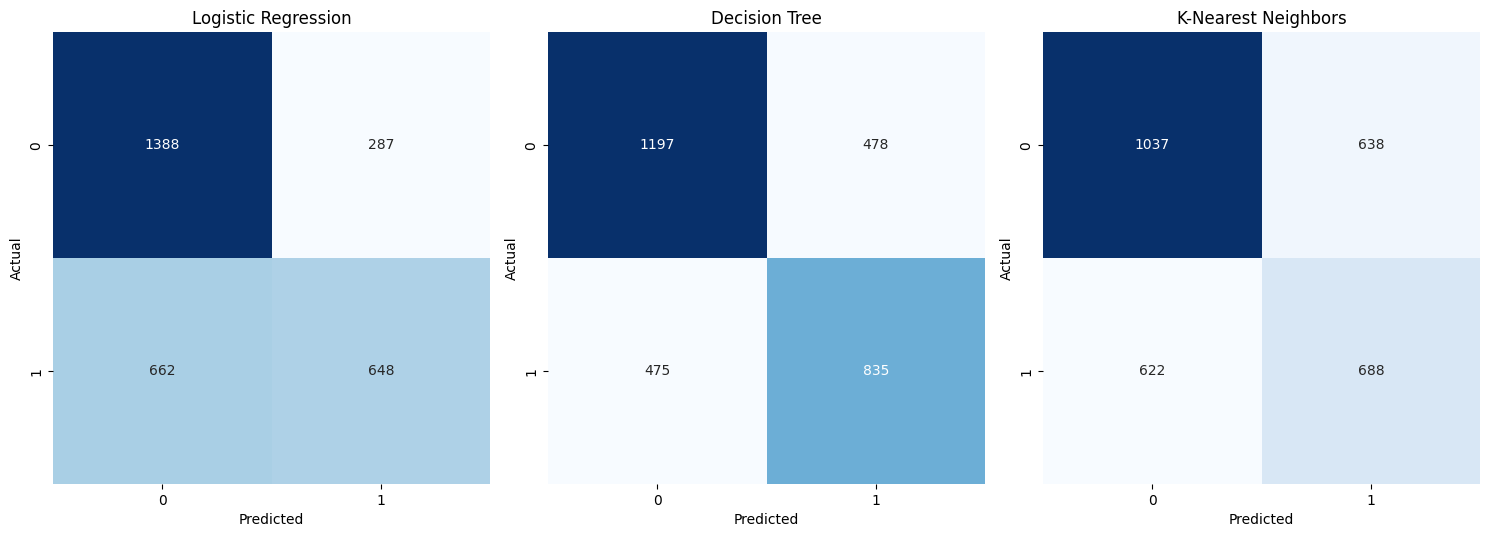

In [55]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for i, model in enumerate(model_list):
    y_pred_class = model.predict(X_test_class)

    cm = confusion_matrix(y_test_class, y_pred_class)

    # Vẽ confusion matrix dưới dạng heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_,
                ax=axes[i], cbar=False)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(model_names[i])

# Hiển thị đồ thị
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Điều chỉnh khoảng cách trên cùng
plt.show()

## Câu 2

### Hồi quy

In [56]:
# linear_reg = LinearRegression()
# rf_reg = RandomForestRegressor(random_state=42)
# dt_reg = DecisionTreeRegressor()
# gbs_reg = GradientBoostingRegressor()

#### Xử lý RandomForestRegressor

In [57]:
# rf_regressor = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10],

# }

# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_rf_model = grid_search.best_estimator_

In [58]:
# best_rf_model.n_estimators, best_rf_model.max_depth

In [59]:
# rf_regressor = RandomForestRegressor()

# param_grid = {
#     'n_estimators':  [200],
#     'max_depth': [None],
#    'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],

# }

# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_rf_model = grid_search.best_estimator_

# best_rf_model

In [60]:
# rf_regressor = RandomForestRegressor()

# param_grid = {
#     'min_samples_split': [10],
#     'bootstrap': [True, False],
#     'n_estimators':  [200],
#     'max_depth': [None],
#     'min_samples_leaf': [1],

# }

# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_rf_model = grid_search.best_estimator_


In [61]:
# best_rf_model

In [62]:
# rf_regressor = RandomForestRegressor()

# param_grid = {
#     'n_estimators':  [200],
#     'max_depth': [None],
#     'min_samples_split': [10],
#     'min_samples_leaf': [1],
#     'bootstrap': [True],
#     'ccp_alpha': [0.0, 0.005, 0.01, 0.02, 0.05]
# }

# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)


# best_rf_model = grid_search.best_estimator_

# y_pred = best_rf_model.predict(X_test)


# mse = mean_squared_error(y_test, y_pred)

# mse

In [63]:
# best_rf_model

In [64]:
params = {
    'bootstrap': True,
    'max_depth': 10,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 200,
    'ccp_alpha': 0.0
}

rf_regressor = RandomForestRegressor(**params)

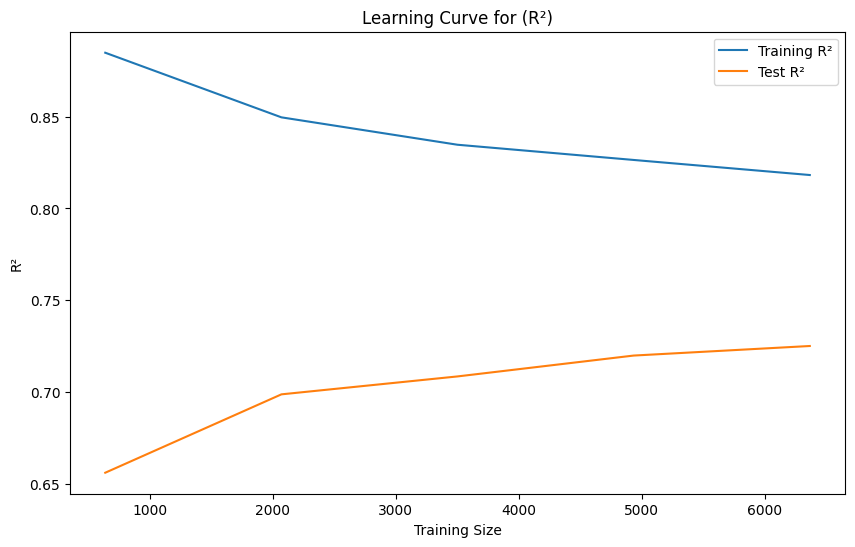

In [65]:
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(rf_regressor, X_train, y_train, cv=5, scoring="r2")

train_mean_regressor = np.mean(train_scores_rf, axis=1)
test_mean_regressor = np.mean(test_scores_rf, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, train_mean_regressor, label=f"Training R²")
plt.plot(train_sizes_rf, test_mean_regressor, label=f"Test R²")

# Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
plt.xlabel('Training Size')
plt.ylabel('R²')
plt.legend()
plt.title(f'Learning Curve for (R²)')
plt.show()

In [66]:
rf_regressor.fit(X_train, y_train)

y_pred_rf_reg = rf_reg.predict(X_test)
y_pred_rf_regressor = rf_regressor.predict(X_test)

# Tính toán các chỉ số đánh giá cho rf_reg
mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
rmse_rf_reg = np.sqrt(mse_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

# Tính toán các chỉ số đánh giá cho rf_regressor
mae_rf_regressor = mean_absolute_error(y_test, y_pred_rf_regressor)
mse_rf_regressor = mean_squared_error(y_test, y_pred_rf_regressor)
rmse_rf_regressor = np.sqrt(mse_rf_regressor)
r2_rf_regressor = r2_score(y_test, y_pred_rf_regressor)

In [67]:
data = {
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Trước overfitting': [mae_rf_reg, rmse_rf_reg, r2_rf_reg],
    'Sau overfitting': [mae_rf_regressor, rmse_rf_regressor, r2_rf_regressor]
}

comparison_df = pd.DataFrame(data)
comparison_df

,Metric,Trước overfitting,Sau overfitting
0,MAE,0.070859,0.070970
1,RMSE,0.101041,0.100165
2,R²,0.728573,0.733257


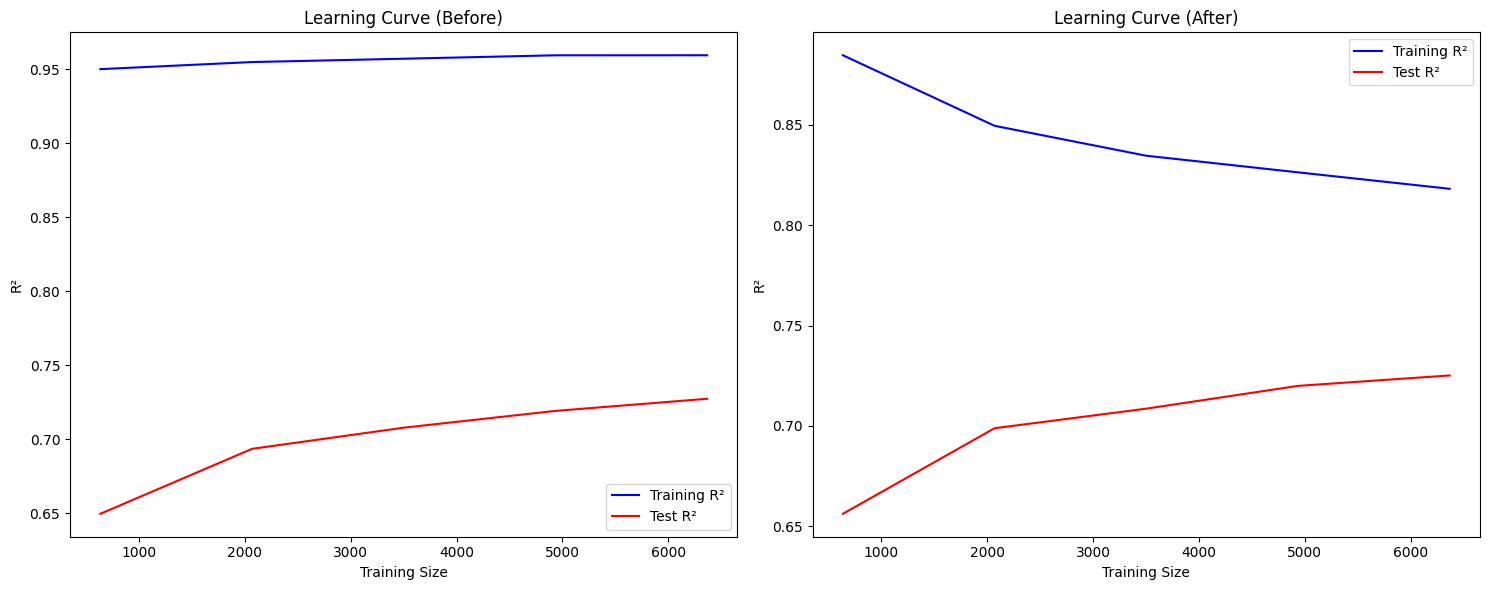

In [68]:
train_sizes_rf_before = learning_curve_results['Random Forest'].iloc[:, 0]
train_mean_rf_before = learning_curve_results['Random Forest'].iloc[:, 1]
test_mean_rf_before = learning_curve_results['Random Forest'].iloc[:, 2]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(train_sizes_rf_before, train_mean_rf_before, label=f"Training R²", color='blue')
ax1.plot(train_sizes_rf_before, test_mean_rf_before, label=f"Test R²", color='red')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('R²')
ax1.set_title('Learning Curve (Before)')
ax1.legend(loc='best')

ax2.plot(train_sizes_rf, train_mean_regressor, label=f"Training R²", color='blue')
ax2.plot(train_sizes_rf, test_mean_regressor, label=f"Test R²", color='red')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('R²')
ax2.set_title('Learning Curve (After)')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

#### Xử lý GradientBoostingRegressor

In [69]:
# gb_regressor = GradientBoostingRegressor()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],

# }

# grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_gb_model = grid_search.best_estimator_
# best_gb_model

In [70]:
# gb_regressor = GradientBoostingRegressor()

# param_grid = {
#     'n_estimators': [200],
#     'learning_rate': [ 0.2],
#     'max_depth': [3, 5, None],
#     'min_samples_split': [2, 5, 10, 15],
# }

# grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_gb_model = grid_search.best_estimator_
# best_gb_model

In [71]:
min_samples_leaf_values = [1, 2, 4, 5]

for min_samples_leaf in min_samples_leaf_values:
    gb_regressor = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.2,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=min_samples_leaf
    )

    gb_regressor.fit(X_train, y_train)

    y_pred = gb_regressor.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    print(f"R2 for min_samples_leaf={min_samples_leaf}: {r2}")


R2 for min_samples_leaf=1: 0.7541836181967806
R2 for min_samples_leaf=2: 0.7527037493845887
R2 for min_samples_leaf=4: 0.7545984297046793
R2 for min_samples_leaf=5: 0.7545599669717237


In [72]:
params = {
    'n_estimators':200,
    'learning_rate':0.2,
    'max_depth':5,
    'min_samples_split':5,
    'min_samples_leaf':2,
    'subsample': 0.8
}

gbs_regressor = GradientBoostingRegressor(**params)

In [73]:
gbs_regressor.fit(X_train, y_train)

y_pred_gbs_reg = gbs_reg.predict(X_test)
y_pred_gbs_regressor = gbs_regressor.predict(X_test)

# Tính toán các chỉ số đánh giá cho gbs_reg
mae_gbs_reg = mean_absolute_error(y_test, y_pred_gbs_reg)
mse_gbs_reg = mean_squared_error(y_test, y_pred_gbs_reg)
rmse_gbs_reg = np.sqrt(mse_gbs_reg)
r2_gbs_reg = r2_score(y_test, y_pred_gbs_reg)

# Tính toán các chỉ số đánh giá cho gbs_regressor
mae_gbs_regressor = mean_absolute_error(y_test, y_pred_gbs_regressor)
mse_gbs_regressor = mean_squared_error(y_test, y_pred_gbs_regressor)
rmse_gbs_regressor = np.sqrt(mse_gbs_regressor)
r2_gbs_regressor = r2_score(y_test, y_pred_gbs_regressor)

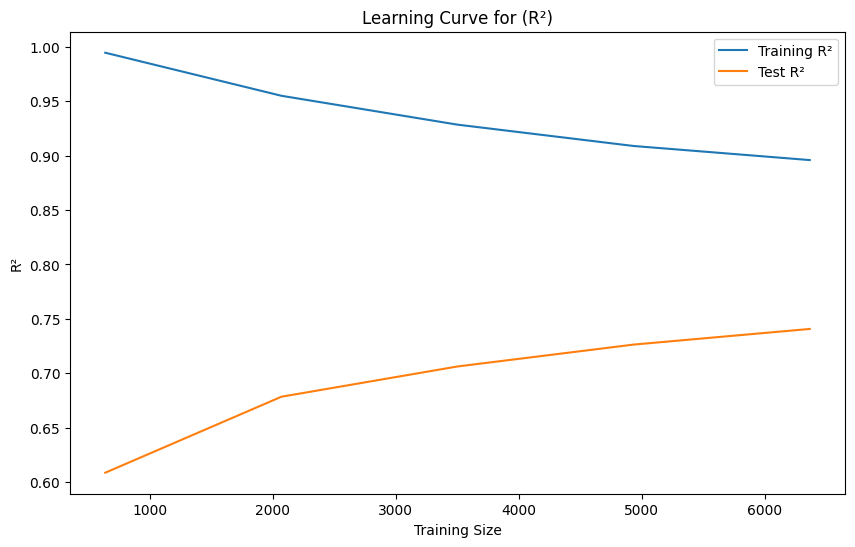

In [74]:
train_sizes_gbs, train_scores_gbs, test_scores_gbs = learning_curve(gbs_regressor, X_train, y_train, cv=5, scoring="r2")

train_mean_gbs = np.mean(train_scores_gbs, axis=1)
test_mean_gbs = np.mean(test_scores_gbs, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_gbs, train_mean_gbs, label=f"Training R²")
plt.plot(train_sizes_gbs, test_mean_gbs, label=f"Test R²")

# Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
plt.xlabel('Training Size')
plt.ylabel('R²')
plt.legend()
plt.title(f'Learning Curve for (R²)')
plt.show()

In [75]:
data = {
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Trước overfitting': [mae_gbs_reg, rmse_gbs_reg, r2_gbs_reg],
    'Sau overfitting': [mae_gbs_regressor, rmse_gbs_regressor, r2_gbs_regressor]
}

comparison_df = pd.DataFrame(data)
comparison_df

,Metric,Trước overfitting,Sau overfitting
0,MAE,0.073784,0.068416
1,RMSE,0.104142,0.096837
2,R²,0.711653,0.750686


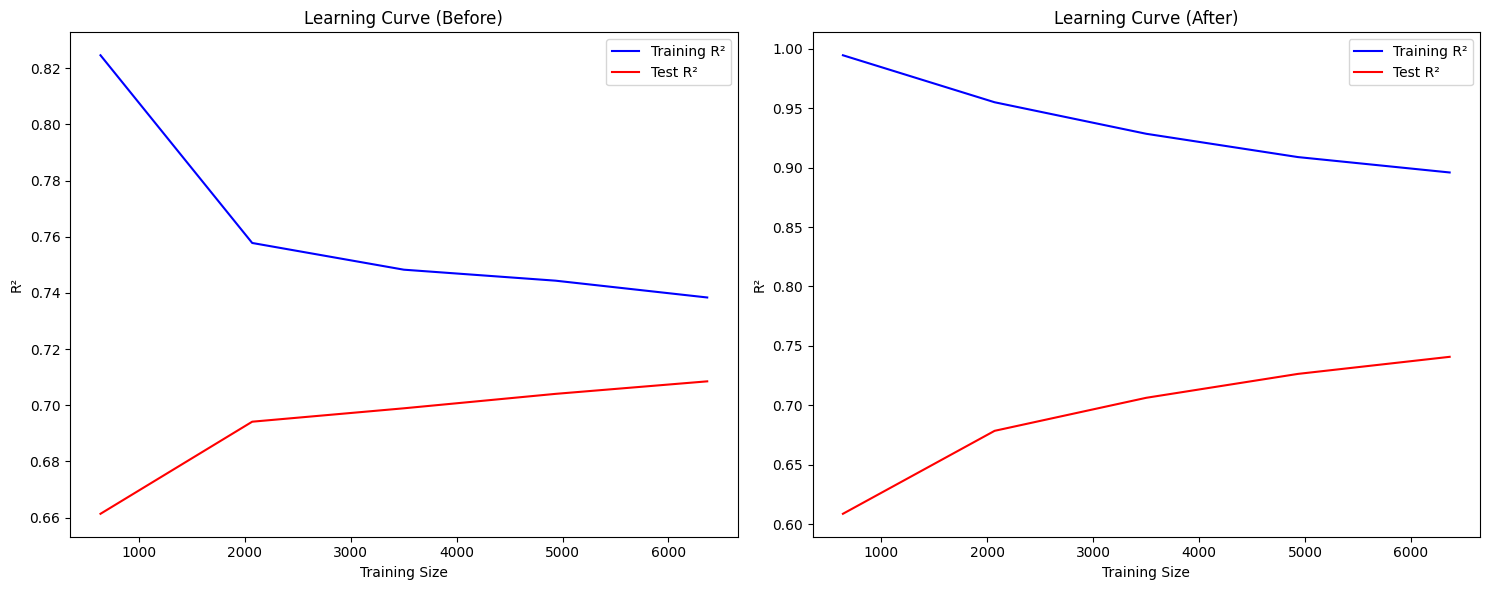

In [76]:
train_sizes_gbs_before = learning_curve_results['Gradient Boosting'].iloc[:, 0]
train_mean_gbs_before = learning_curve_results['Gradient Boosting'].iloc[:, 1]
test_mean_gbs_before = learning_curve_results['Gradient Boosting'].iloc[:, 2]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(train_sizes_gbs_before, train_mean_gbs_before, label=f"Training R²", color='blue')
ax1.plot(train_sizes_gbs_before, test_mean_gbs_before, label=f"Test R²", color='red')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('R²')
ax1.set_title('Learning Curve (Before)')
ax1.legend(loc='best')

ax2.plot(train_sizes_gbs, train_mean_gbs, label=f"Training R²", color='blue')
ax2.plot(train_sizes_gbs, test_mean_gbs, label=f"Test R²", color='red')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('R²')
ax2.set_title('Learning Curve (After)')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

#### Xử lý DecisionTreeRegressor

In [77]:
# dt_regressor = DecisionTreeRegressor()

# param_grid = {
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 10],
#     'max_features': [None, 'sqrt', 'log2'],
# }

# grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_dt_model = grid_search.best_estimator_

In [78]:
# best_dt_model

In [79]:
params = {
    'max_depth':10,
    'min_samples_split':2,
    'min_samples_leaf':10,
    'max_features': None
}

dt_regressor = DecisionTreeRegressor(**params)

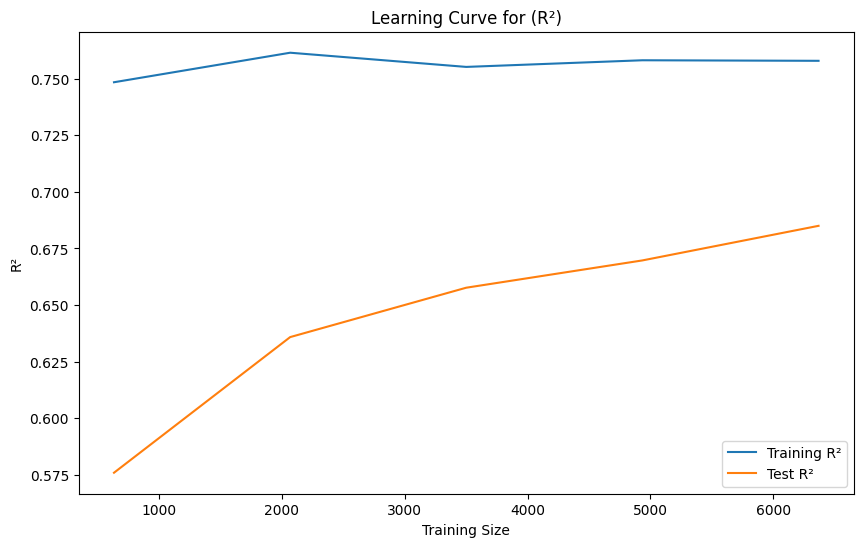

In [80]:
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(dt_regressor, X_train, y_train, cv=5, scoring="r2")

train_mean_dt = np.mean(train_scores_dt, axis=1)
test_mean_dt = np.mean(test_scores_dt, axis=1)

# Tạo đồ thị riêng cho mỗi mô hình
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_dt, train_mean_dt, label=f"Training R²")
plt.plot(train_sizes_dt, test_mean_dt, label=f"Test R²")

# Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
plt.xlabel('Training Size')
plt.ylabel('R²')
plt.legend()
plt.title(f'Learning Curve for (R²)')
plt.show()

In [81]:
dt_regressor.fit(X_train, y_train)

y_pred_dt_reg = dt_reg.predict(X_test)
y_pred_dt_regressor = dt_regressor.predict(X_test)

# Tính toán các chỉ số đánh giá cho dt_reg
mae_dt_reg = mean_absolute_error(y_test, y_pred_dt_reg)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
rmse_dt_reg = np.sqrt(mse_dt_reg)
r2_dt_reg = r2_score(y_test, y_pred_dt_reg)

# Tính toán các chỉ số đánh giá cho dt_regressor
mae_dt_regressor = mean_absolute_error(y_test, y_pred_dt_regressor)
mse_dt_regressor = mean_squared_error(y_test, y_pred_dt_regressor)
rmse_dt_regressor = np.sqrt(mse_dt_regressor)
r2_dt_regressor = r2_score(y_test, y_pred_dt_regressor)

In [82]:
data = {
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Trước overfitting': [mae_dt_reg, rmse_dt_reg, r2_dt_reg],
    'Sau overfitting': [mae_dt_regressor, rmse_dt_regressor, r2_dt_regressor]
}

comparison_df = pd.DataFrame(data)
comparison_df

,Metric,Trước overfitting,Sau overfitting
0,MAE,0.089355,0.075925
1,RMSE,0.134086,0.108821
2,R²,0.522000,0.685163


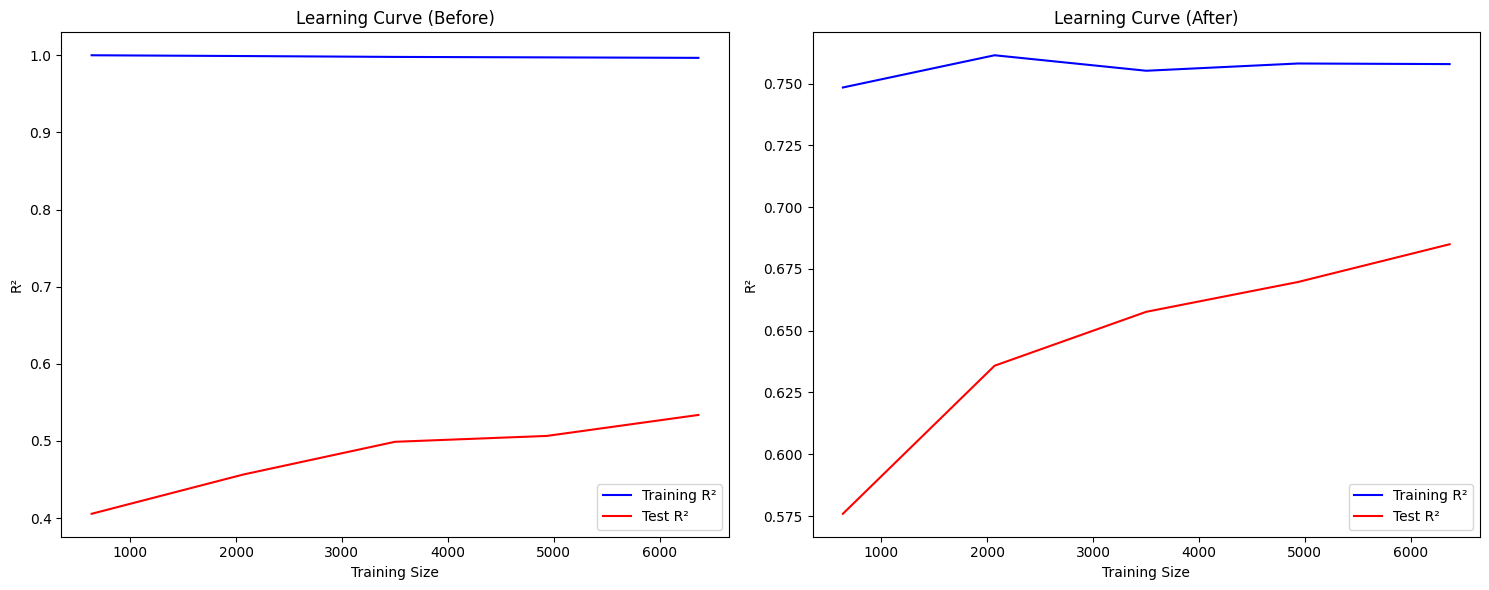

In [83]:
train_sizes_dt_before = learning_curve_results['Decision Tree'].iloc[:, 0]
train_mean_dt_before = learning_curve_results['Decision Tree'].iloc[:, 1]
test_mean_dt_before = learning_curve_results['Decision Tree'].iloc[:, 2]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(train_sizes_dt_before, train_mean_dt_before, label=f"Training R²", color='blue')
ax1.plot(train_sizes_dt_before, test_mean_dt_before, label=f"Test R²", color='red')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('R²')
ax1.set_title('Learning Curve (Before)')
ax1.legend(loc='best')

ax2.plot(train_sizes_dt, train_mean_dt, label=f"Training R²", color='blue')
ax2.plot(train_sizes_dt, test_mean_dt, label=f"Test R²", color='red')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('R²')
ax2.set_title('Learning Curve (After)')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

#### Tổng quan

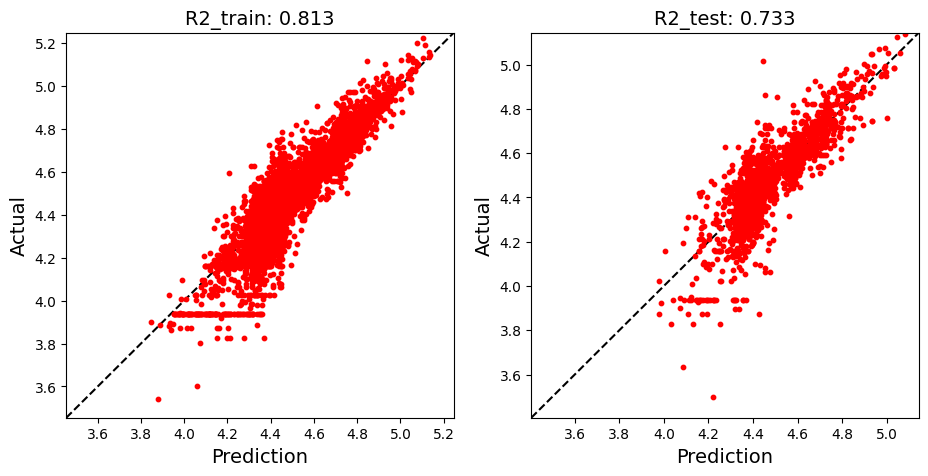

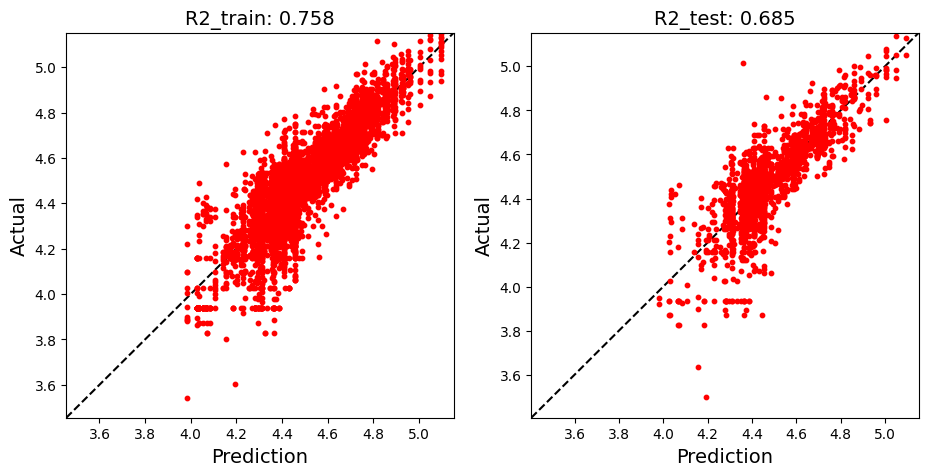

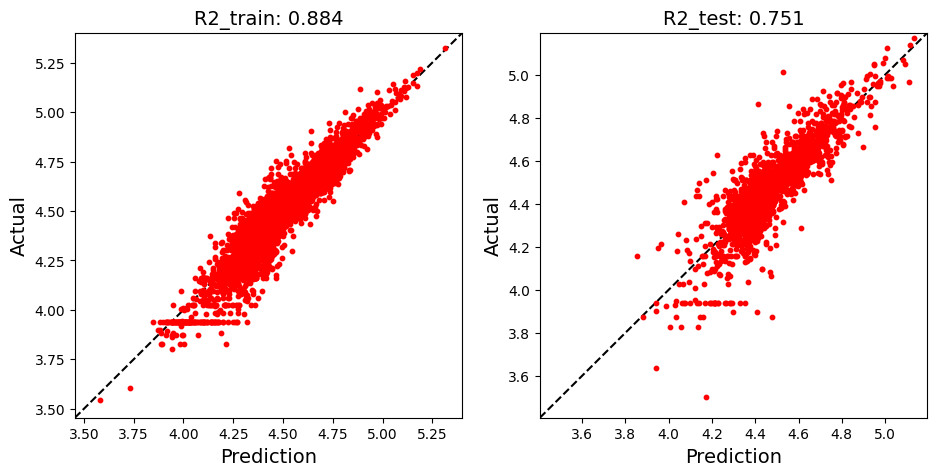

In [84]:
model_list = [rf_regressor, dt_regressor, gbs_regressor]
for model in model_list:
    plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)

### Phân loại

#### Logistic Regression

In [85]:
# dt_clf_a = DecisionTreeClassifier()

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features': [None, 'sqrt', 'log2'],
#     'max_leaf_nodes': [None, 10, 20, 30],
#     'min_impurity_decrease': [0.0, 0.01, 0.05],
#     'class_weight': [None, 'balanced'],
#     'splitter': ['best', 'random']
# }

# grid_search_dt = GridSearchCV(estimator=dt_clf_a, param_grid=param_grid, cv=5, scoring='accuracy')

# grid_search_dt.fit(X_train_class, y_train_class)

# print("Best Parameters: ", grid_search_dt.best_params_)
# print("Best Score: ", grid_search_dt.best_score_)

In [86]:
dt_class = DecisionTreeClassifier(
    class_weight=None,  # Trọng số lớp
    criterion='gini',  # Tiêu chí phân chia (Gini hoặc Entropy)
    max_depth=None,  # Độ sâu tối đa của cây (None có nghĩa không giới hạn)
    max_features=None,  # Số tính năng được sử dụng khi phân chia
    max_leaf_nodes=30,  # Số nút lá tối đa
    min_impurity_decrease=0.0,  # Độ giảm impurity tối thiểu
    min_samples_leaf=1,  # Số lượng mẫu tối thiểu cho mỗi nút lá
    min_samples_split=2,  # Số lượng mẫu tối thiểu để chia một nút
    splitter='best'  # Phương pháp phân chia tại mỗi nút (best hoặc random)
)

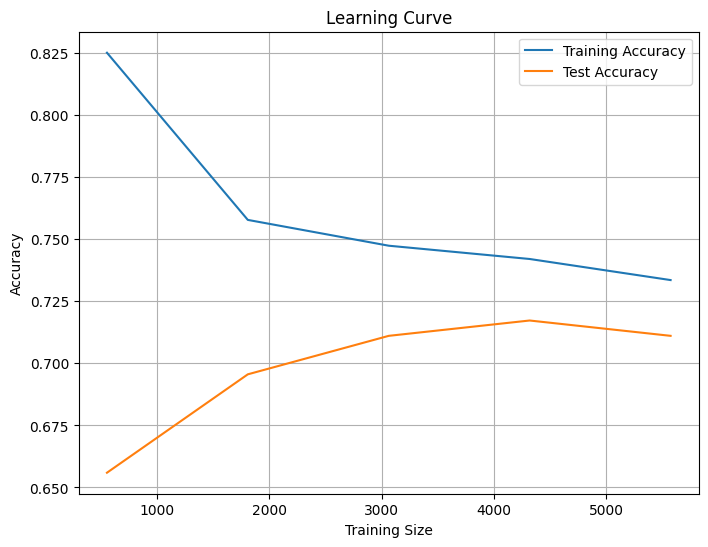

In [87]:
train_sizes_dt_class, train_scores_dt_class, test_scores_dt_class = learning_curve(
    dt_class, X_train_class, y_train_class, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = np.mean(train_scores_dt_class, axis=1)
test_mean = np.mean(test_scores_dt_class, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_dt_class, train_mean, label="Training Accuracy")
plt.plot(train_sizes_dt_class, test_mean, label="Test Accuracy")

plt.title(f'Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

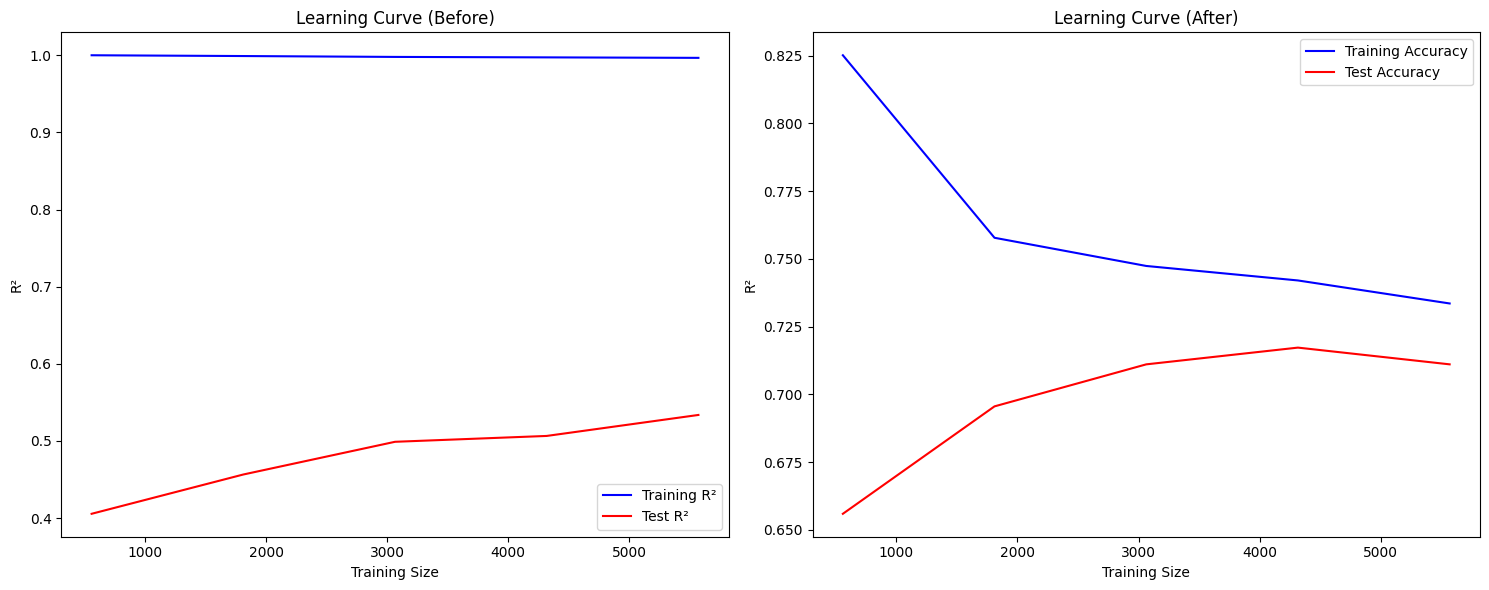

In [88]:
train_sizes_dt_class_before = learning_curve_results_class['Decision Tree'].iloc[:, 0]
train_mean_dt_class_before = learning_curve_results['Decision Tree'].iloc[:, 1]
test_mean_dt_class_before = learning_curve_results['Decision Tree'].iloc[:, 2]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(train_sizes_dt_class_before, train_mean_dt_class_before, label=f"Training R²", color='blue')
ax1.plot(train_sizes_dt_class_before, test_mean_dt_class_before, label=f"Test R²", color='red')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('R²')
ax1.set_title('Learning Curve (Before)')
ax1.legend(loc='best')

plt.plot(train_sizes_dt_class, train_mean, label="Training Accuracy", color='blue')
plt.plot(train_sizes_dt_class, test_mean, label="Test Accuracy", color='red')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('R²')
ax2.set_title('Learning Curve (After)')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

#### RandomForestClassifier

In [89]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
# }

# rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# grid_search.fit(X_train_class, y_train_class)

# best_rf_model = grid_search.best_estimator_
# y_pred_best = best_rf_model.predict(X_test_class)

# accuracy_best = accuracy_score(y_test_class, y_pred_best)
# print(f"Optimized model accuracy: {accuracy_best * 100:.2f}%")

In [90]:
# best_rf_model.n_estimators

In [91]:
# param_grid = {
#     'n_estimators': [100],
#     'max_depth': [20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# grid_search.fit(X_train_class, y_train_class)

# best_rf_model = grid_search.best_estimator_
# y_pred_best = best_rf_model.predict(X_test_class)

# accuracy_best = accuracy_score(y_test_class, y_pred_best)
# print(f"Optimized model accuracy: {accuracy_best * 100:.2f}%")

In [92]:
# best_rf_model.min_samples_split

In [93]:
# param_grid = {
#     'n_estimators': [100],
#     'max_depth': [20],
#     'min_samples_split': [2],
#     'min_samples_leaf': [2],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# grid_search.fit(X_train_class, y_train_class)

# best_rf_model = grid_search.best_estimator_
# y_pred_best = best_rf_model.predict(X_test_class)

# accuracy_best = accuracy_score(y_test_class, y_pred_best)
# print(f"Optimized model accuracy: {accuracy_best * 100:.2f}%")

In [94]:
# best_rf_model.max_features, best_rf_model.bootstrap

In [95]:
rt_class = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    random_state=42,
    class_weight='balanced'
)

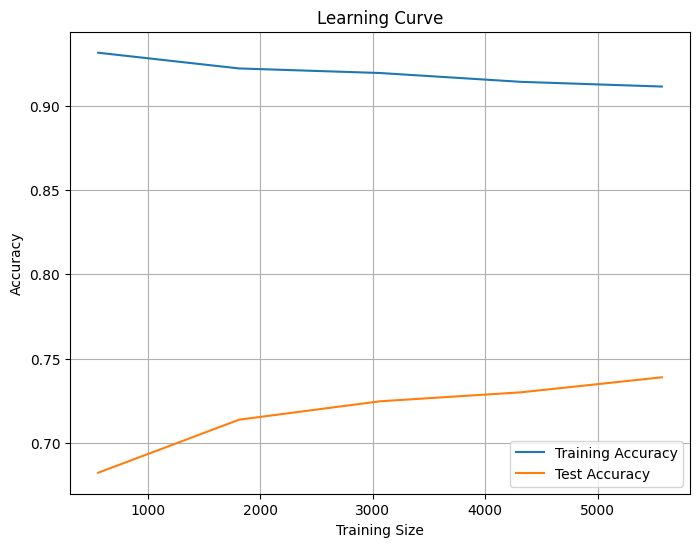

In [96]:
train_sizes_rt_class, train_scores_rt_class, test_scores_rt_class = learning_curve(
    rt_class, X_train_class, y_train_class, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = np.mean(train_scores_rt_class, axis=1)
test_mean = np.mean(test_scores_rt_class, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_rt_class, train_mean, label="Training Accuracy")
plt.plot(train_sizes_rt_class, test_mean, label="Test Accuracy")

plt.title(f'Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
rt_class.fit(X_train_class, y_train_class)
y_pred_rt_class = rt_class.predict(X_test_class)
acc_rt_class = accuracy_score(y_test_class, y_pred_rt_class)
acc_rt_class

0.7574539363484087

#### XGBoost

In [98]:
!pip install xgboost

In [99]:
import xgboost as xgb

In [100]:
# model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# # Thiết lập các tham số để tìm kiếm
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'gamma': [0, 0.1, 0.2]
# }

# # Khởi tạo GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# # Huấn luyện với GridSearchCV
# grid_search.fit(X_train_class, y_train_class)

# # Sử dụng mô hình tốt nhất để dự đoán
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test_class)

# # Đánh giá độ chính xác
# accuracy_best = accuracy_score(y_test_class, y_pred_best)
# print(f"Optimized model accuracy: {accuracy_best * 100:.2f}%")


In [101]:
xg_class = xgb.XGBClassifier (
    n_estimators= 200,
    max_depth= 6,
    learning_rate= 0.1,
    subsample= 0.8,
    colsample_bytree= 0.8,
    gamma= 0
)

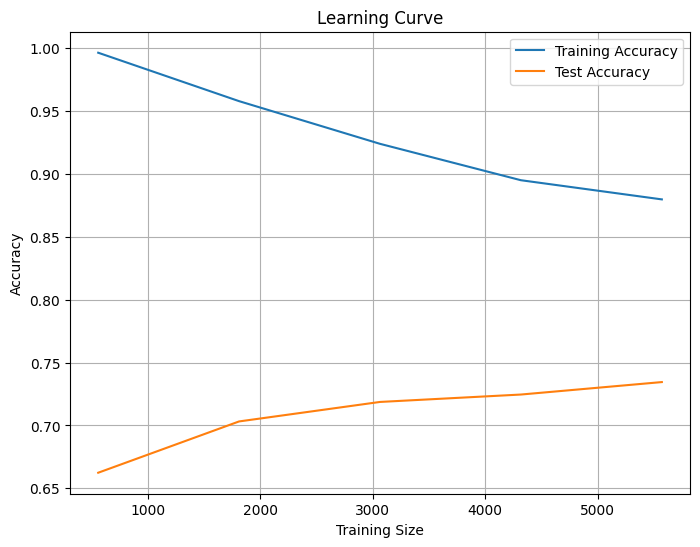

In [102]:
train_sizes_xg_class, train_scores_xg_class, test_scores_xg_class = learning_curve(
    xg_class, X_train_class, y_train_class, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = np.mean(train_scores_xg_class, axis=1)
test_mean = np.mean(test_scores_xg_class, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_xg_class, train_mean, label="Training Accuracy")
plt.plot(train_sizes_xg_class, test_mean, label="Test Accuracy")

plt.title(f'Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Câu 3

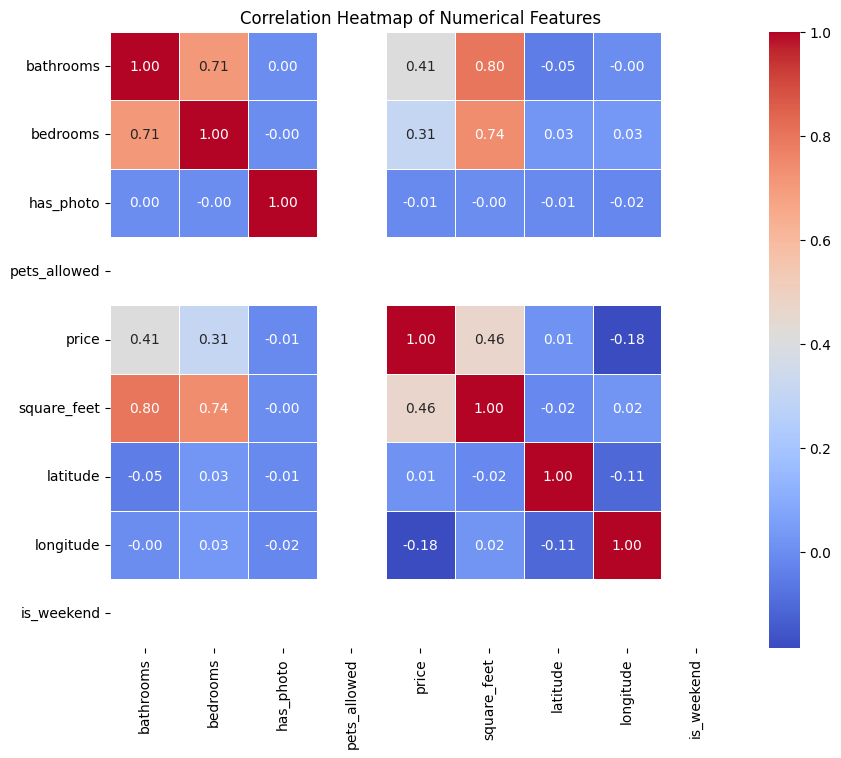

In [103]:
numerical_columns = rental_a.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

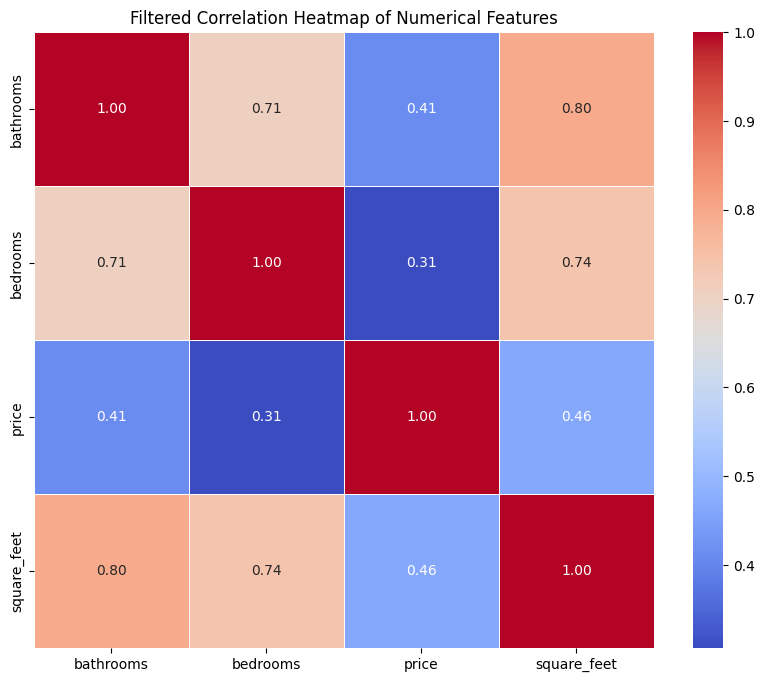

In [104]:
columns_to_keep = corr_matrix.columns[((corr_matrix > 0.1) & (corr_matrix < 0.9)).any()]

filtered_data = numerical_columns[columns_to_keep]

filtered_corr_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Filtered Correlation Heatmap of Numerical Features')
plt.show()

In [105]:
# rental_a['amenities'] = label_encoder.fit_transform(rental_a['amenities'])

# rental_a = pd.get_dummies(rental_a)


# y_classification = rental_a['target_classification_column']
rental_a = pd.get_dummies(rental_a)
X = rental_a.drop('square_feet', axis= 1)
y = rental_a['square_feet']
bc_result = boxcox(y)
y_boxcox = bc_result[0]
lambda_ = bc_result[1]
X = filtered_data
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y_boxcox, test_size= 0.2, random_state = 42)

In [106]:
X_train_a

,bathrooms,bedrooms,price,square_feet
4089,1.0,1.0,820,747
736,1.0,1.0,560,463
830,1.0,1.0,1595,483
5107,1.0,1.0,1570,815
9529,2.5,4.0,3995,1933
...,...,...,...,...
5772,1.0,2.0,1450,880
5227,1.0,2.0,825,825
5426,1.0,3.0,1185,849
882,1.0,2.0,870,493


In [107]:
reg_model = LinearRegression()

# Huấn luyện mô hình
reg_model.fit(X_train_a, y_train_a)

# Dự đoán
y_pred_reg = reg_model.predict(X_test_a)

# Đánh giá mô hình
mse = mean_squared_error(y_test_a, y_pred_reg)
r2 = r2_score(y_test_a, y_pred_reg)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 0.0100
R-squared: 0.7354


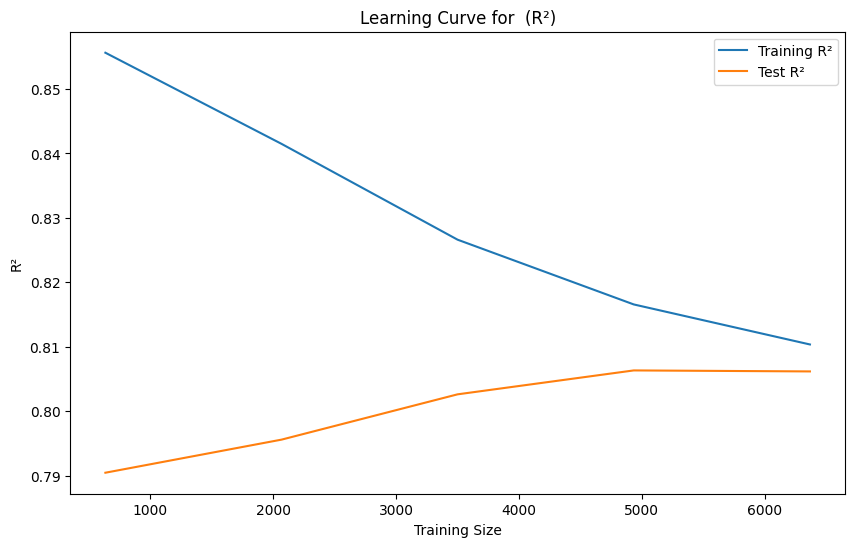

In [108]:
train_sizes, train_scores, test_scores = learning_curve(reg_model, X_train_a, y_train_a, cv=5, scoring="r2")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)


# Tạo đồ thị riêng cho mỗi mô hình
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label=f"Training R²")
plt.plot(train_sizes, test_mean, label=f"Test R²")

# Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
plt.xlabel('Training Size')
plt.ylabel('R²')
plt.legend()
plt.title(f'Learning Curve for  (R²)')
plt.show()

In [109]:
# Đánh giá mô hình linear_reg
y_pred_linear_reg = linear_reg.predict(X_test)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)

# Đánh giá mô hình reg_model
y_pred_reg_model = reg_model.predict(X_test_a)
r2_reg_model = r2_score(y_test_a, y_pred_reg_model)
mae_reg_model = mean_absolute_error(y_test_a, y_pred_reg_model)

In [110]:
metrics = {
    "Model": ["Trước", "Sau"],
    "R²": [r2_linear_reg, r2_reg_model],
    "MAE": [mae_linear_reg, mae_reg_model]
}

metrics_df = pd.DataFrame(metrics)

metrics_df

,Model,R²,MAE
0,Trước,0.608997,0.084908
1,Sau,0.735359,0.056357


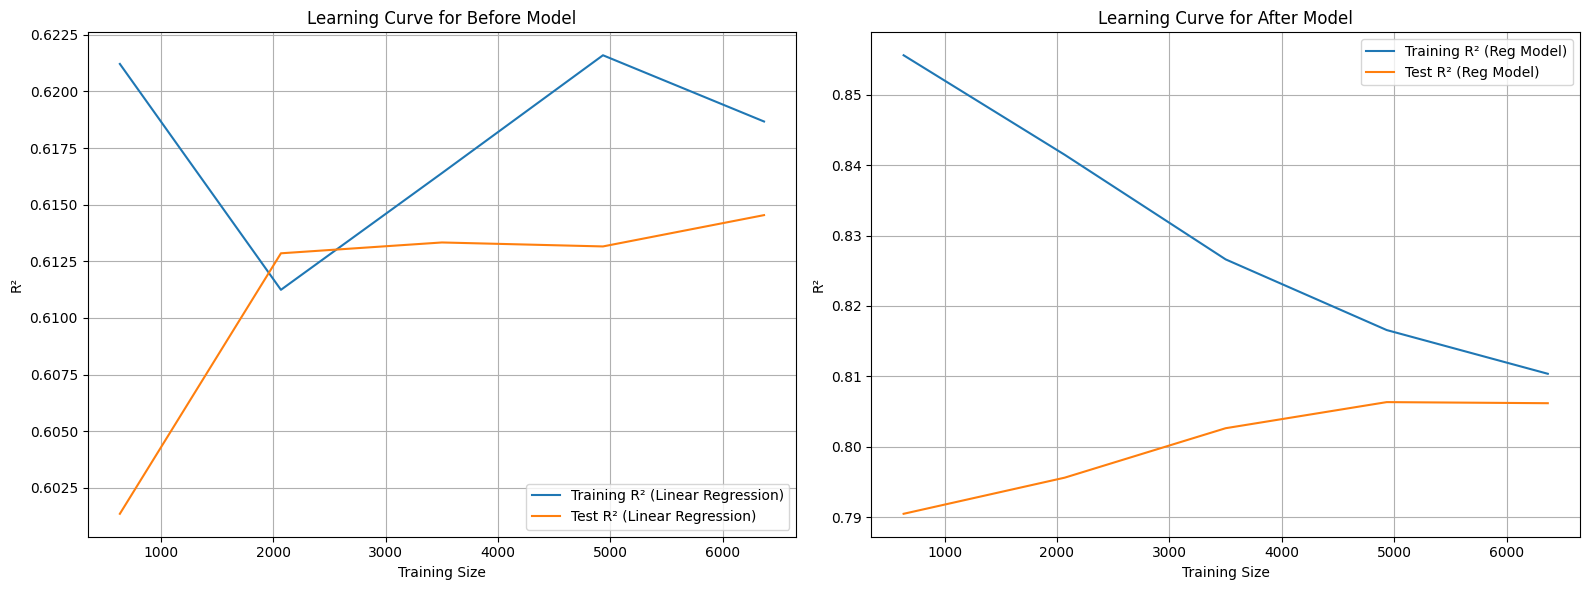

In [111]:
ig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Đoạn mã cho Linear Regression
train_sizes, train_scores, test_scores = learning_curve(linear_reg, X_train, y_train, cv=5, scoring="r2")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Vẽ learning curve cho Linear Regression
axes[0].plot(train_sizes, train_mean, label="Training R² (Linear Regression)")
axes[0].plot(train_sizes, test_mean, label="Test R² (Linear Regression)")

# Đặt tiêu đề và nhãn cho biểu đồ Linear Regression
axes[0].set_xlabel('Training Size')
axes[0].set_ylabel('R²')
axes[0].set_title('Learning Curve for Before Model')
axes[0].legend()
axes[0].grid(True)

# Đoạn mã cho Reg Model
train_sizes, train_scores, test_scores = learning_curve(reg_model, X_train_a, y_train_a, cv=5, scoring="r2")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Vẽ learning curve cho Reg Model
axes[1].plot(train_sizes, train_mean, label="Training R² (Reg Model)")
axes[1].plot(train_sizes, test_mean, label="Test R² (Reg Model)")

# Đặt tiêu đề và nhãn cho biểu đồ Reg Model
axes[1].set_xlabel('Training Size')
axes[1].set_ylabel('R²')
axes[1].set_title('Learning Curve for After Model')
axes[1].legend()
axes[1].grid(True)

# Hiển thị cả hai biểu đồ
plt.tight_layout()
plt.show()